In [36]:
import uproot 
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
from iminuit import Minuit
import matplotlib.cm as cm
from matplotlib.patches import Patch
from iminuit import Minuit
from scipy.optimize import curve_fit
import bened as ben

# GAMMA XDVR

## CARICAMENTO DATI DA FILE E DIVISIONE CANALI

In [37]:
#giorno2
americio = uproot.open('group23\\10min-americio-gr23\\RAW\\DataR_10min-americio-gr23.root')
sodio = uproot.open('group23\\10min-sodio-gr23-SOGLIA\\RAW\\DataR_10min-sodio-gr23-SOGLIA.root')
europio = uproot.open('group23\\20min-europio-gr23\\RAW\\DataR_20min-europio-gr23.root')
back2 = uproot.open('group23\\30min-background-gr23\\RAW\\DataR_30min-background-gr23.root')
#giorno3
autunite = uproot.open('group23\\15min-autunite-gr23\\RAW\\DataR_15min-autunite-gr23.root')
enea = uproot.open('group23\\15min-Enea-water-gr23\\RAW\\DataR_15min-Enea-water-gr23.root')
porcini = uproot.open('group23\\15min-porcini-mushrooms-gr23\\RAW\\DataR_15min-porcini-mushrooms-gr23.root')
cement = uproot.open('group23\\15min-portland-cement-gr23\\RAW\\DataR_15min-portland-cement-gr23.root')
potassio = uproot.open('group23\\15min-potassio-gr23\\RAW\\DataR_15min-potassio-gr23.root')
zirconio = uproot.open('group23\\15min-zirconium-oxide-gr23\\RAW\\DataR_15min-zirconium-oxide-gr23.root')
back3 = uproot.open('group23\\15min-background-gr23-giorno3\\RAW\\DataR_15min-background-gr23.root')
#radon
exposed = uproot.open('group23\\30min-exposed-radon-gr23\\RAW\\DataR_30min-exposed-radon-gr23.root')
unexposed =uproot.open('group23\\30min-non-exposed-radon-gr23\\RAW\\DataR_30min-non-exposed-radon-gr23.root')
calibrated = uproot.open('group23\\30min-calibrated-radon-gr23\\RAW\\DataR_30min-calibrated-radon-gr23.root')

In [38]:
energy_americio = np.asarray(americio['Data_R;3']['Energy'].array(), dtype=np.float64)
canaliAM = np.asarray(americio['Data_R;3']['Channel'].array(), dtype=np.int64)

energy_sodio = np.asarray(sodio['Data_R;6']['Energy'].array(), dtype=np.float64)
canaliNA = np.asarray(sodio['Data_R;6']['Channel'].array(), dtype=np.int64)

energy_europio = np.asarray(europio['Data_R;6']['Energy'].array(), dtype=np.float64)
canaliEU = np.asarray(europio['Data_R;6']['Channel'].array(), dtype=np.int64)

energy_autunite = np.asarray(autunite['Data_R;4']['Energy'].array(), dtype=np.float64)
canaliAUT = np.asarray(autunite['Data_R;4']['Channel'].array(), dtype=np.int64)

energy_enea = np.asarray(enea['Data_R;4']['Energy'].array(), dtype=np.float64)
canaliENEA = np.asarray(enea['Data_R;4']['Channel'].array(), dtype=np.int64)

energy_porcini = np.asarray(porcini['Data_R;4']['Energy'].array(), dtype=np.float64)
canaliPORCINI = np.asarray(porcini['Data_R;4']['Channel'].array(), dtype=np.int64)

energy_cement = np.asarray(cement['Data_R;5']['Energy'].array(), dtype=np.float64)
canaliCEMENTO = np.asarray(cement['Data_R;5']['Channel'].array(), dtype=np.int64)

energy_potassio = np.asarray(potassio['Data_R;4']['Energy'].array(), dtype=np.float64)
canaliPOTASSIO = np.asarray(potassio['Data_R;4']['Channel'].array(), dtype=np.int64)

energy_zirconio = np.asarray(zirconio['Data_R;5']['Energy'].array(), dtype=np.float64)
canaliZIRCONIO = np.asarray(zirconio['Data_R;5']['Channel'].array(), dtype=np.int64)

fondo2giorno = np.asarray(back2['Data_R;4']['Energy'].array(), dtype=np.float64)
canaliback2 = np.asarray(back2['Data_R;4']['Channel'].array(), dtype=np.int64)

fondo3giorno = np.asarray(back3['Data_R;5']['Energy'].array(), dtype=np.float64)
canaliback3 = np.asarray(back3['Data_R;5']['Channel'].array(), dtype=np.int64)

energy_exposed = np.asarray(exposed['Data_R;9']['Energy'].array(), dtype=np.float64)
canaliexp = np.asarray(exposed['Data_R;9']['Channel'].array(), dtype=np.int64)

energy_unexposed = np.asarray(unexposed['Data_R;9']['Energy'].array(), dtype=np.float64)
canaliunexp = np.asarray(unexposed['Data_R;9']['Channel'].array(), dtype=np.int64)

energy_calibrated = np.asarray(calibrated['Data_R;9']['Energy'].array(), dtype=np.float64)
canalical = np.asarray(calibrated['Data_R;9']['Channel'].array(), dtype=np.int64)

In [39]:
# Separa i dati in due array distinti per ogni canale (0 e 1)
americio_ch0 = energy_americio[canaliAM == 0]
americio_ch1 = energy_americio[canaliAM == 1]

sodio_ch0 = energy_sodio[canaliNA == 0]
sodio_ch1 = energy_sodio[canaliNA == 1]

europio_ch0 = energy_europio[canaliEU == 0]
europio_ch1 = energy_europio[canaliEU == 1]

autunite_ch0 = energy_autunite[canaliAUT == 0]
autunite_ch1 = energy_autunite[canaliAUT == 1]

enea_ch0 = energy_enea[canaliENEA == 0]
enea_ch1 = energy_enea[canaliENEA == 1]

porcini_ch0 = energy_porcini[canaliPORCINI == 0]
porcini_ch1 = energy_porcini[canaliPORCINI == 1]

cemento_ch0 = energy_cement[canaliCEMENTO == 0]
cemento_ch1 = energy_cement[canaliCEMENTO == 1]

potassio_ch0 = energy_potassio[canaliPOTASSIO == 0]
potassio_ch1 = energy_potassio[canaliPOTASSIO == 1]

zirconio_ch0 = energy_zirconio[canaliZIRCONIO == 0]
zirconio_ch1 = energy_zirconio[canaliZIRCONIO == 1]

fondo2_ch0 = fondo2giorno[canaliback2 == 0]
fondo2_ch1 = fondo2giorno[canaliback2 == 1]

fondo3_ch0 = fondo3giorno[canaliback3 == 0]
fondo3_ch1 = fondo3giorno[canaliback3 == 1]

exposed_ch0 = energy_exposed[canaliexp == 0]
exposed_ch1 = energy_exposed[canaliexp == 1]

unexposed_ch0 = energy_unexposed[canaliunexp == 0]
unexposed_ch1 = energy_unexposed[canaliunexp == 1]

calibrated_ch0 = energy_calibrated[canalical == 0]
calibrated_ch1 = energy_calibrated[canalical == 1]

## ENERGY CALIBRATION

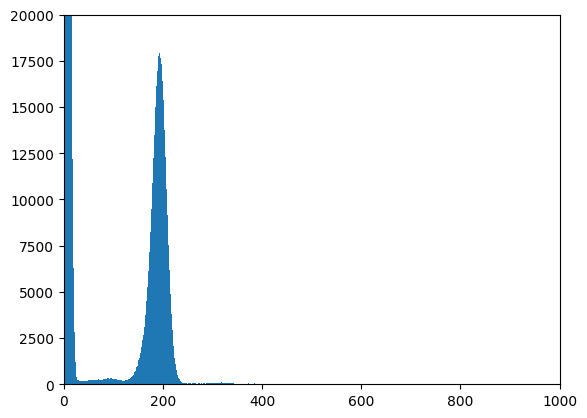

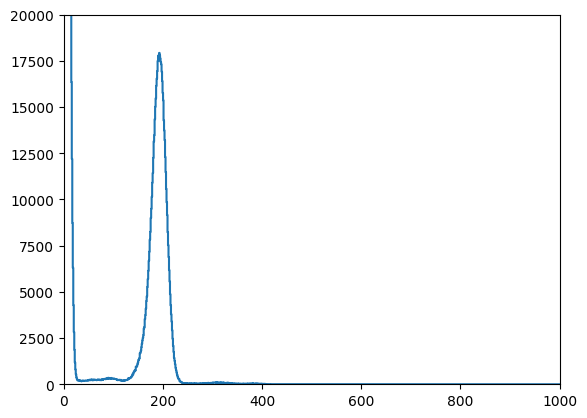

In [100]:
b=int(americio_ch0.max())
plt.hist(americio_ch0, bins=b)
plt.ylim(0, 20000)
plt.xlim(0, 1000)
plt.show()

counts, bin_edges = np.histogram(americio_ch0, bins=b, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.step(bin_centers, counts)
plt.xlim(0, 1000)
plt.ylim(0, 20000)
plt.show()

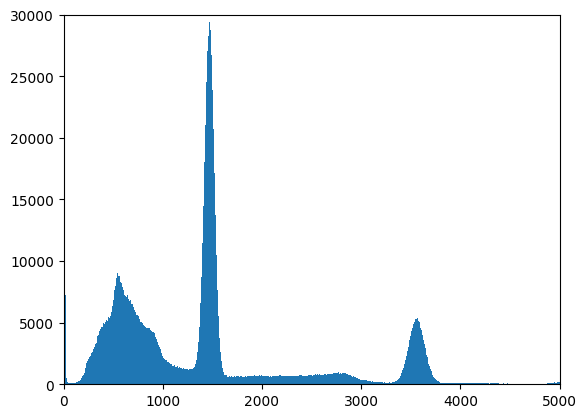

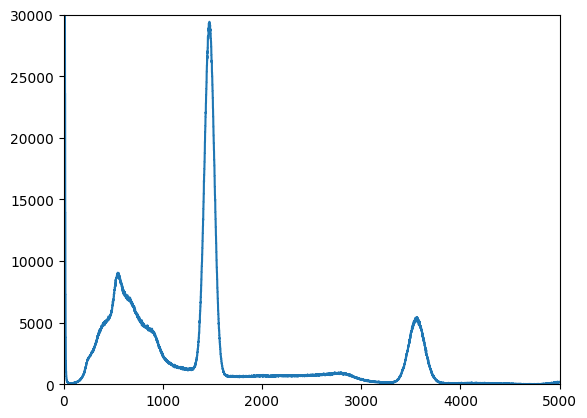

In [105]:
b=int(sodio_ch0.max())
plt.hist(sodio_ch0, bins=b)
plt.ylim(0, 30000)
plt.xlim(0, 5000)
plt.show()

counts, bin_edges = np.histogram(sodio_ch0, bins=b, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.step(bin_centers, counts)
plt.xlim(0, 5000)
plt.ylim(0, 30000)
plt.show()

### background e picchi

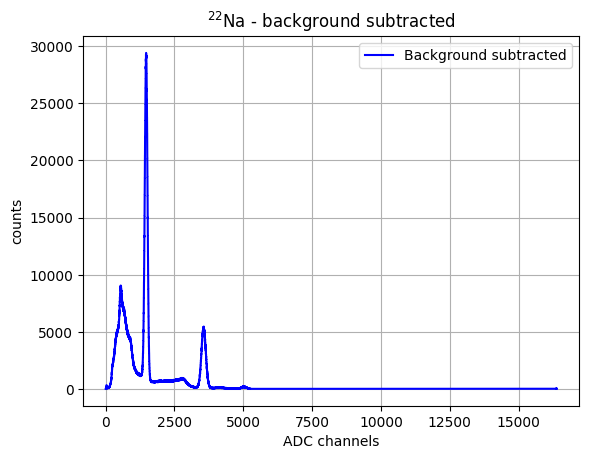

Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 3697540.54636566 ± 4780.387316848829
Media = 1469.7140240992871 ± 0.0753701305588071
Sigma = 50.82980298739661 ± 0.07687536497353165
Chi-quadro = 3895.450989216009
Chi-quadro ridotto = 15.771056636502061
Integrale dell'istogramma nel range [1368.0544181244938, 1571.3736300740804] = 3523750


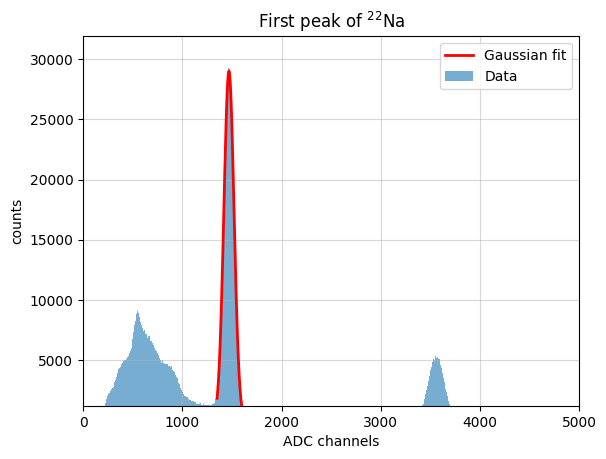

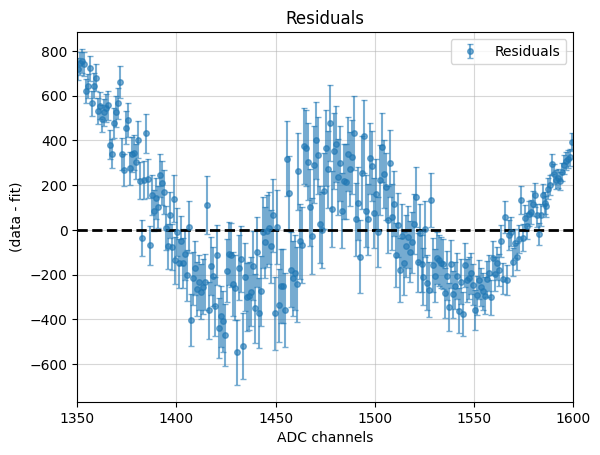

Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 1070699.0896962592 ± 1446.932123584376
Media = 3559.824076266031 ± 0.1265596219708771
Sigma = 81.14238443964994 ± 0.12673611221669107
Chi-quadro = 4451.403844810062
Chi-quadro ridotto = 8.956546971448816
Integrale dell'istogramma nel range [3397.5393073867313, 3722.108845145331] = 1019322


c:\Users\Utente\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


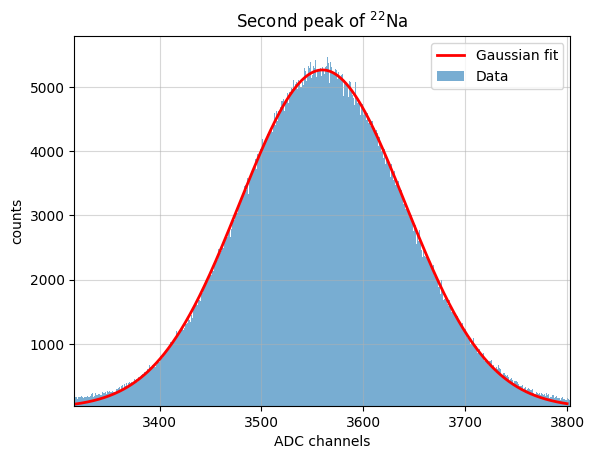

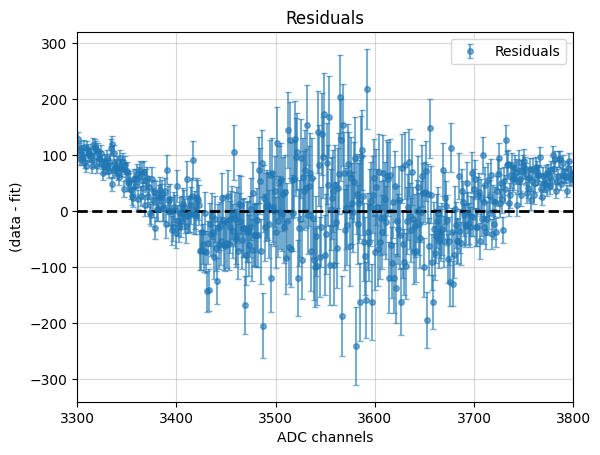

In [ ]:
bin_sodio_ch0_corr, hist_sodio_ch0_corr = ben.background(sodio_ch0, fondo2_ch0, None, 'ADC channels', 'counts', '$^{22}$Na - background subtracted')
sodioch0_peak1 = ben.normal(bin_centers=bin_sodio_ch0_corr, counts=hist_sodio_ch0_corr, xlabel='ADC channels', ylabel='counts', titolo='First peak of $^{22}$Na', xmin=1350, xmax=1600,  n=2)
sodioch0_peak2 = ben.normal(bin_centers=bin_sodio_ch0_corr, counts=hist_sodio_ch0_corr, xlabel='ADC channels', ylabel='counts', titolo='Second peak of $^{22}$Na', xmin=3300, xmax=3800, n=2)

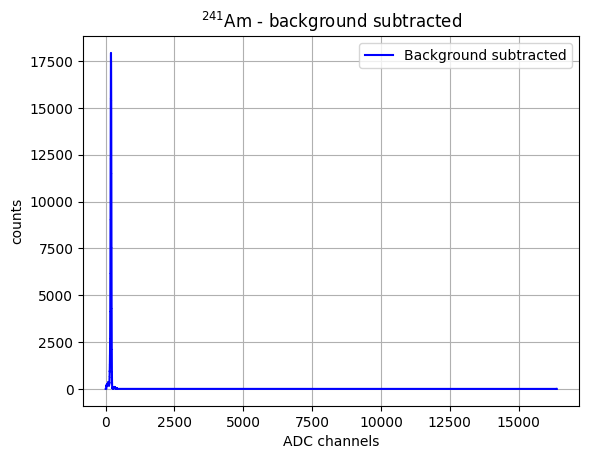

Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 643366.2278809226 ± 3677.889868423464
Media = 192.87560791765935 ± 0.09672156890027868
Sigma = 14.652542878049662 ± 0.09672157045694589
Chi-quadro = 33319.28971192855
Chi-quadro ridotto = 160.96275223153887
Integrale dell'istogramma nel range [163.57052216156004, 222.18069367375867] = 610031


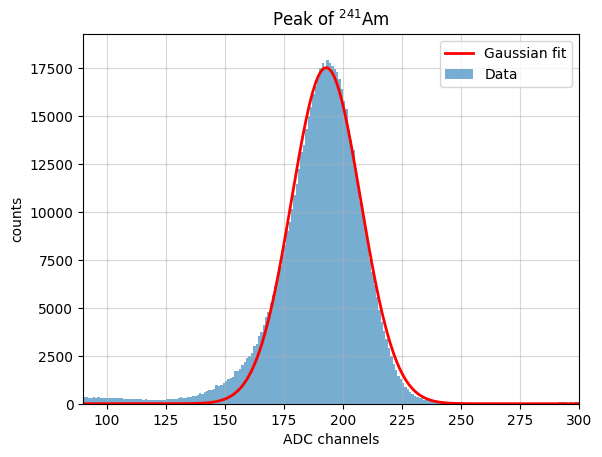

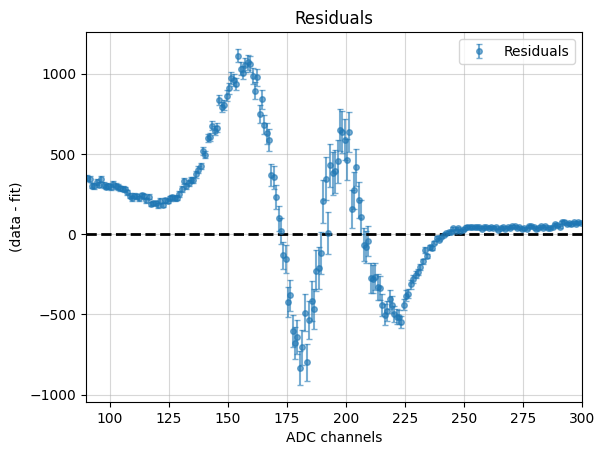

In [ ]:
bin_americio_ch0_corr, hist_americio_ch0_corr = ben.background(americio_ch0, fondo2_ch0, None, 'ADC channels', 'counts', '$^{241}$Am - background subtracted')
americioch0_peak = ben.normal(bin_centers=bin_americio_ch0_corr, counts=hist_americio_ch0_corr, xlabel='ADC channels', ylabel='counts', titolo='Peak of $^{241}$Am', xmin=180, xmax=250, x1=90, x2=300, n=2)

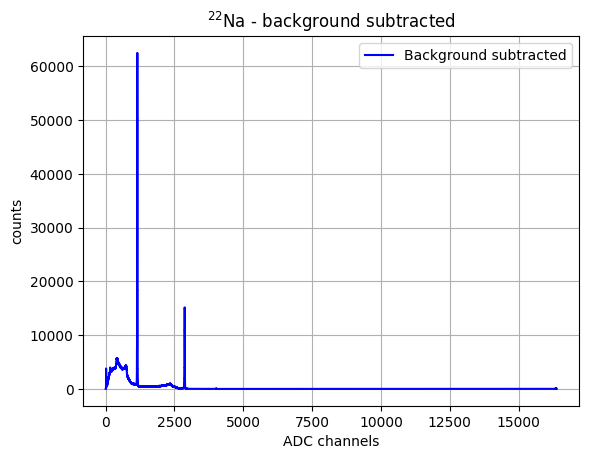

Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 836679.8714480074 ± 6553.949955407284
Media = 1150.1190739811584 ± 0.048917544498720225
Sigma = 5.408240035526738 ± 0.0489190199147417
Chi-quadro = 16561.949693705774
Chi-quadro ridotto = 447.6202619920479
Integrale dell'istogramma nel range [1139.3025939101049, 1160.935554052212] = 798039


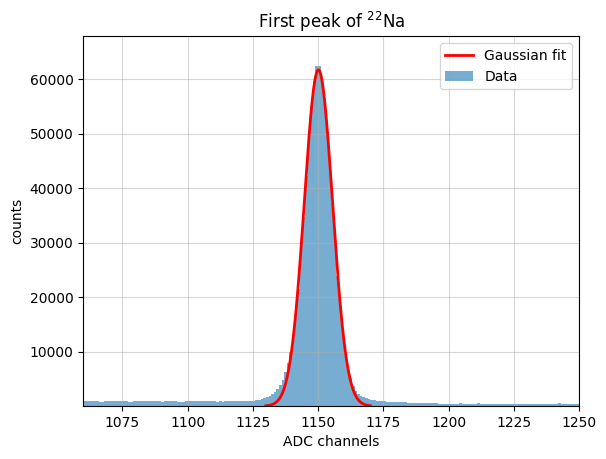

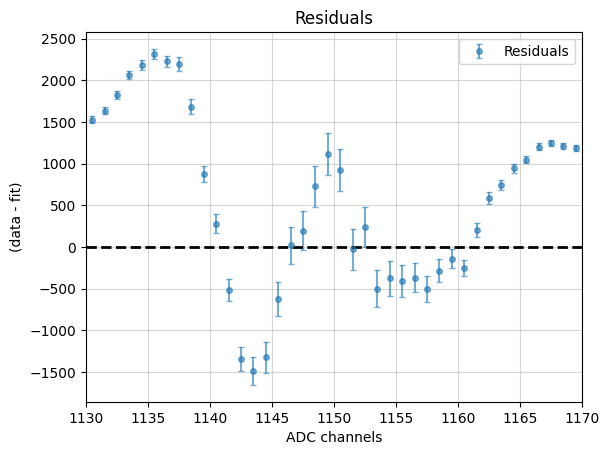

Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 190978.337758391 ± 956.4559050421302
Media = 2870.587831088693 ± 0.02835126844172582
Sigma = 5.034503968167342 ± 0.030560946475005107
Chi-quadro = 132.4776789580772
Chi-quadro ridotto = 6.6238839479038605
Integrale dell'istogramma nel range [2860.518823152358, 2880.6568390250277] = 182925


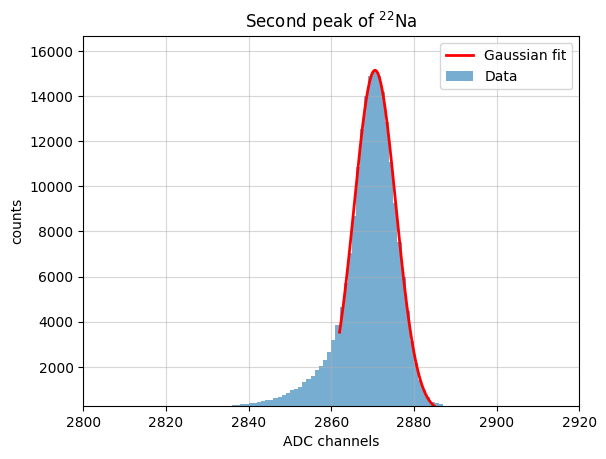

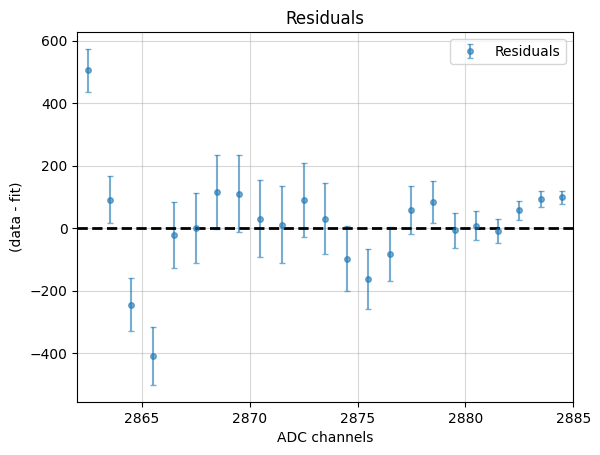

In [42]:
bin_sodio_ch1_corr, hist_sodio_ch1_corr = ben.background(sodio_ch1, fondo2_ch1, None, 'ADC channels', 'counts', '$^{22}$Na - background subtracted')
sodioch1_peak1 = ben.normal(bin_centers=bin_sodio_ch1_corr, counts=hist_sodio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='First peak of $^{22}$Na', xmin=1130, xmax=1170, x1=1060, x2=1250, n=2)
sodioch1_peak2 = ben.normal(bin_centers=bin_sodio_ch1_corr, counts=hist_sodio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='Second peak of $^{22}$Na', xmin=2862, xmax=2885, x1=2800, x2=2920, n=2)

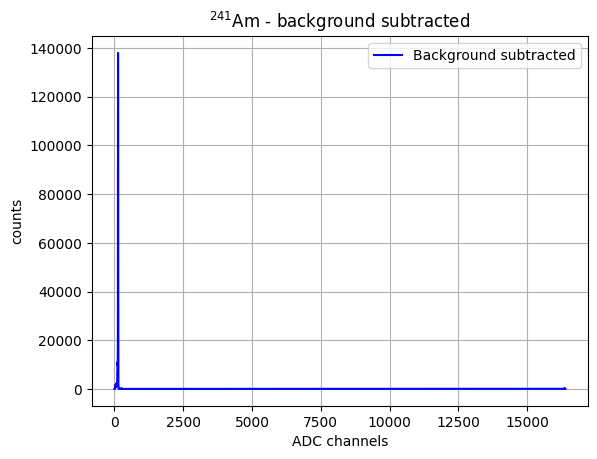

Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 1438184.809264865 ± 18611.312264671797
Media = 133.22961278832653 ± 0.06285022099686503
Sigma = 4.206616314783794 ± 0.06287530915860237
Chi-quadro = 20578.994281607636
Chi-quadro ridotto = 762.1849733928755
Integrale dell'istogramma nel range [124.81638015875895, 141.64284541789414] = 1372091


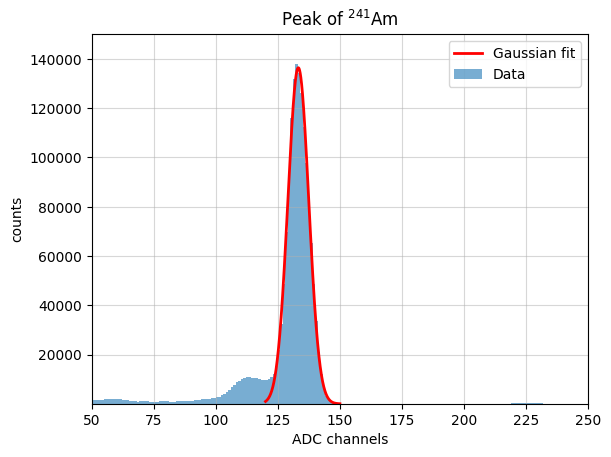

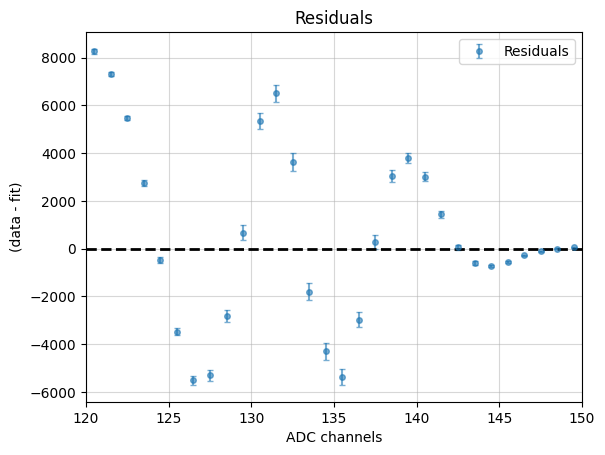

In [43]:
bin_americio_ch1_corr, hist_americio_ch1_corr = ben.background(americio_ch1, fondo2_ch1, None, 'ADC channels', 'counts', '$^{241}$Am - background subtracted')
americioch0_peak = ben.normal(bin_centers=bin_americio_ch1_corr, counts=hist_americio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='Peak of $^{241}$Am', xmin=120, xmax=150, x1=50, x2=250, n=2)

### cella di calibrazione

In [44]:
known_energies=np.array([511, 1274.54, 59.54])

ADC_ch0 = np.array([1469.822779, 3559.824076, 193.5960538])
sigma_ADC_ch0 = np.array([0.06195962621, 0.126559622, 0.03210712039])

ADC_ch1 = np.array([1150.119059, 2870.587831, 133.2296128])
sigma_ADC_ch1 = np.array([0.04778742868, 0.02835126844, 0.062850221])

In [45]:
print('NAI')
calibrazione_ch0 = ben.linear_regression(x=ADC_ch0, y=known_energies, sx=sigma_ADC_ch0, xlabel='ADC channels', ylabel='Theoretical energy [KeV]', titolo='Calibration fit of NaI(Tl)')
print('__________________________________________________\nHPGE')
calibrazione_ch1 = ben.linear_regression(x=ADC_ch1, y=known_energies, sx=sigma_ADC_ch1, xlabel='ADC channels', ylabel='Theoretical energy [KeV]', titolo='Calibration fit of HPGe')

NAI
Parametri ottimizzati:
-----------------------------------------------
Inclinazione (m) = 0.3586726295147739 ± 3.325924117807295e-05
Intercetta (q) = -10.796080596613754 ± 0.0344878846738197
Chi-squared = 12885.150979807393
Reduced chi-squared = 12885.150979807393
__________________________________________________
HPGE
Parametri ottimizzati:
-----------------------------------------------
Inclinazione (m) = 0.4438374481585683 ± 2.175945408741927e-05
Intercetta (q) = 0.4735398622338386 ± 0.05148889989763432
Chi-squared = 2.780665531480684
Reduced chi-squared = 2.780665531480684


In [46]:
picco_am = ADC_ch1[2]*calibrazione_ch1[0]+calibrazione_ch1[1]
print(f'picco americio nell hpge:{picco_am}')

picco americio nell hpge:59.60583122653997


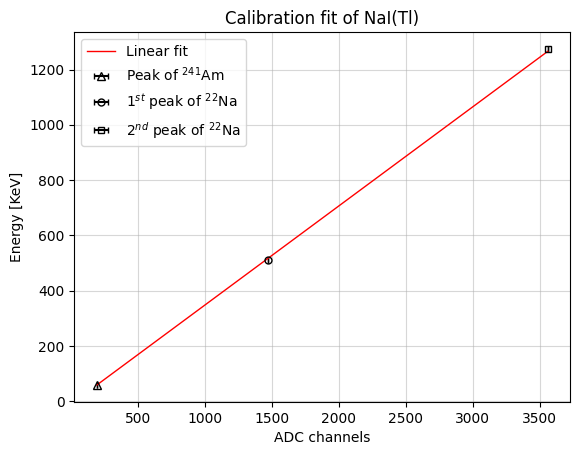

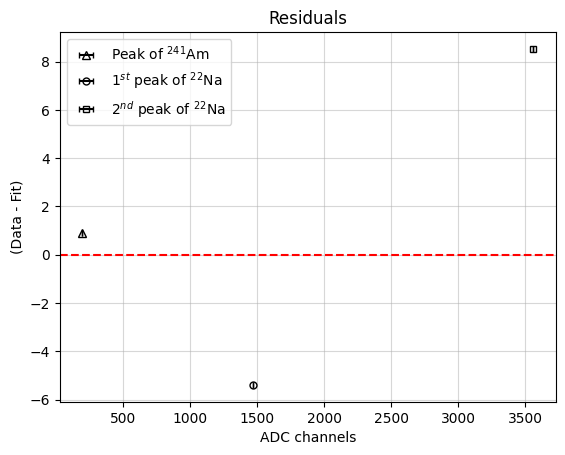

In [47]:
def linear(x, m, q):
    return m*x+q

# Primo grafico: fit di calibrazione
plt.errorbar(ADC_ch0[2], known_energies[2], xerr=sigma_ADC_ch0[2], fmt='^', color='black', label='Peak of $^{241}$Am', markersize=6, capsize=2, markerfacecolor='none')
plt.errorbar(ADC_ch0[0], known_energies[0], xerr=sigma_ADC_ch0[0], fmt='o', color='black', label='$1^{st}$ peak of $^{22}$Na', markersize=5, capsize=2, markerfacecolor='none')
plt.errorbar(ADC_ch0[1], known_energies[1], xerr=sigma_ADC_ch0[1], fmt='s', color='black', label='$2^{nd}$ peak of $^{22}$Na', markersize=5, capsize=2, markerfacecolor='none')

# Fit lineare
x_fit = np.linspace(ADC_ch0.min(), ADC_ch0.max(), 100)
plt.plot(x_fit, linear(x_fit, calibrazione_ch0[0], calibrazione_ch0[1]), color='red', label='Linear fit', lw=1)

# Dettagli del grafico
plt.xlabel('ADC channels')
plt.ylabel('Energy [KeV]')
plt.title('Calibration fit of NaI(Tl)')
plt.grid(alpha=0.5)
plt.legend()
plt.savefig('grafici/energy_calibration/fitNaI.pdf')
plt.show()

# Secondo grafico: residui
fit_values = linear(ADC_ch0, calibrazione_ch0[0], calibrazione_ch0[1])
residuals = known_energies - fit_values

plt.errorbar(ADC_ch0[2], residuals[2], xerr=sigma_ADC_ch0[2], fmt='^', color='black', label='Peak of $^{241}$Am', markersize=6, capsize=2, markerfacecolor='none')
plt.errorbar(ADC_ch0[0], residuals[0], xerr=sigma_ADC_ch0[0], fmt='o', color='black', label='$1^{st}$ peak of $^{22}$Na', markersize=5, capsize=2, markerfacecolor='none')
plt.errorbar(ADC_ch0[1], residuals[1], xerr=sigma_ADC_ch0[1], fmt='s', color='black', label='$2^{nd}$ peak of $^{22}$Na', markersize=5, capsize=2, markerfacecolor='none')

# Linea orizzontale per i residui
plt.axhline(0, color='red', linestyle='--', lw=1.5)

# Dettagli del grafico
plt.xlabel('ADC channels')
plt.ylabel('(Data - Fit)')
plt.title('Residuals')
plt.grid(alpha=0.5)
plt.legend()
plt.savefig('grafici/energy_calibration/residuiNaI.pdf')
plt.show()

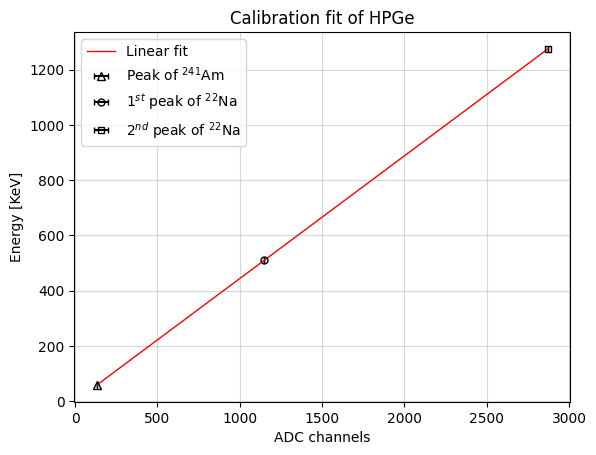

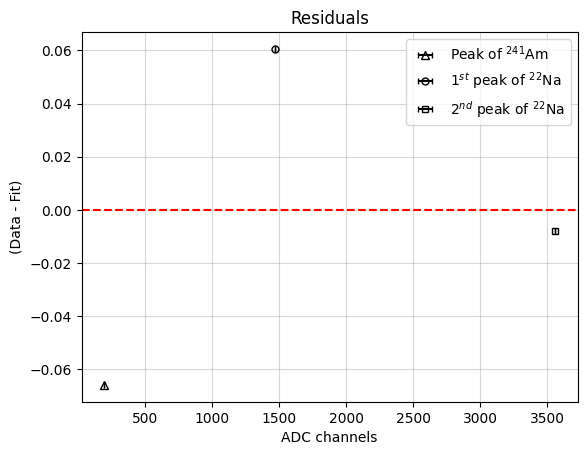

In [48]:
# Primo grafico: fit di calibrazione
plt.errorbar(ADC_ch1[2], known_energies[2], xerr=sigma_ADC_ch1[2], fmt='^', color='black', label='Peak of $^{241}$Am', markersize=6, capsize=2, markerfacecolor='none')
plt.errorbar(ADC_ch1[0], known_energies[0], xerr=sigma_ADC_ch1[0], fmt='o', color='black', label='$1^{st}$ peak of $^{22}$Na', markersize=5, capsize=2, markerfacecolor='none')
plt.errorbar(ADC_ch1[1], known_energies[1], xerr=sigma_ADC_ch1[1], fmt='s', color='black', label='$2^{nd}$ peak of $^{22}$Na', markersize=5, capsize=2, markerfacecolor='none')

# Fit lineare
x_fit = np.linspace(ADC_ch1.min(), ADC_ch1.max(), 100)
plt.plot(x_fit, linear(x_fit, calibrazione_ch1[0], calibrazione_ch1[1]), color='red', label='Linear fit', lw=1)

# Dettagli del grafico
plt.xlabel('ADC channels')
plt.ylabel('Energy [KeV]')
plt.title('Calibration fit of HPGe')
plt.grid(alpha=0.5)
plt.legend()
plt.savefig('grafici/energy_calibration/fitHPGe.pdf')
plt.show()

# Secondo grafico: residui
fit_values = linear(ADC_ch1, calibrazione_ch1[0], calibrazione_ch1[1])
residuals = known_energies - fit_values

plt.errorbar(ADC_ch0[2], residuals[2], xerr=sigma_ADC_ch1[2], fmt='^', color='black', label='Peak of $^{241}$Am', markersize=6, capsize=2, markerfacecolor='none')
plt.errorbar(ADC_ch0[0], residuals[0], xerr=sigma_ADC_ch1[0], fmt='o', color='black', label='$1^{st}$ peak of $^{22}$Na', markersize=5, capsize=2, markerfacecolor='none')
plt.errorbar(ADC_ch0[1], residuals[1], xerr=sigma_ADC_ch1[1], fmt='s', color='black', label='$2^{nd}$ peak of $^{22}$Na', markersize=5, capsize=2, markerfacecolor='none')

# Linea orizzontale per i residui
plt.axhline(0, color='red', linestyle='--', lw=1.5)

# Dettagli del grafico
plt.xlabel('ADC channels')
plt.ylabel('(Data - Fit)')
plt.title('Residuals')
plt.grid(alpha=0.5)
plt.legend()
plt.savefig('grafici/energy_calibration/residuiHPGe.pdf')
plt.show()

## EFFICIENZA HPGe

### calcolo picchi

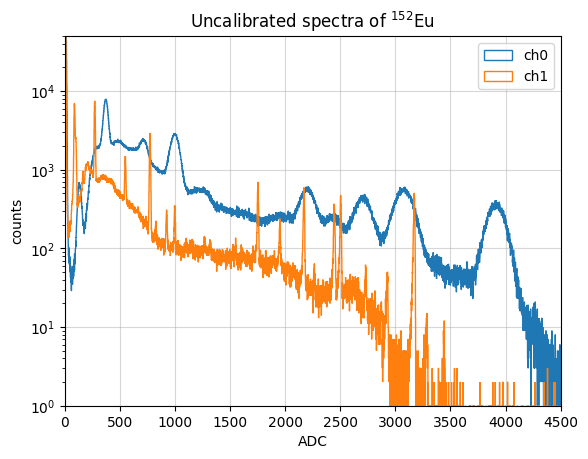

In [49]:
plt.hist(europio_ch0, bins=int(europio_ch0.max()), histtype='step', lw=1, label="ch0"), plt.hist(europio_ch1, bins=int(europio_ch1.max()), histtype='step', lw=1, label="ch1")
plt.title('Uncalibrated spectra of $^{152}$Eu')
plt.legend(loc='upper right')
plt.xlabel("ADC")
plt.ylabel("counts")
plt.xlim(0, 4500)
plt.ylim(1, 50000)
plt.yscale("log")
plt.grid(True, alpha=0.5)
plt.show()

In [50]:
europio1_calib = europio_ch1*calibrazione_ch1[0]+calibrazione_ch1[1]
fondo2_ch1_calib = fondo2_ch1*calibrazione_ch1[0]+calibrazione_ch1[1]

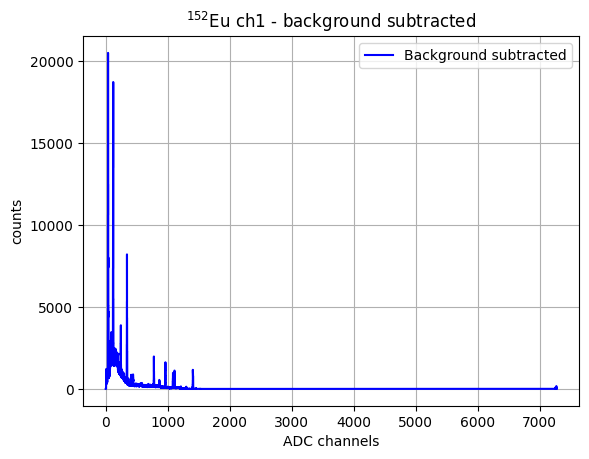

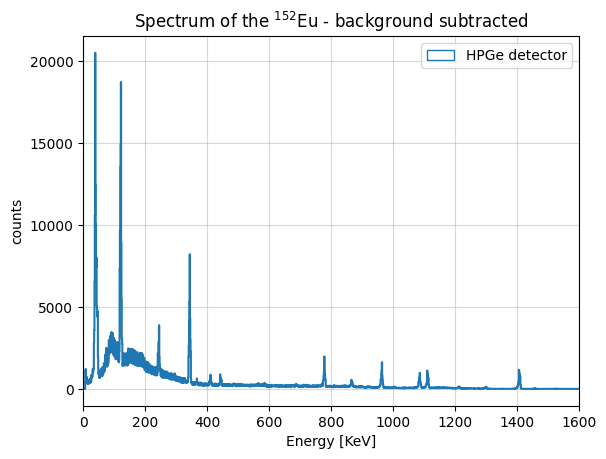

In [414]:
bin_europio_calib, hist_europio_calib = ben.background(europio1_calib, fondo2_ch1_calib, None, 'ADC channels', 'counts', '$^{152}$Eu ch1 - background subtracted')
plt.step(bin_europio_calib, hist_europio_calib)
custom_patches = [
    Patch(edgecolor='#1f77b4', facecolor='none', linewidth=1, label='HPGe detector'),
]
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.title('Spectrum of the $^{152}$Eu - background subtracted')
plt.legend(handles=custom_patches)
plt.xlim(0, 1600)
plt.grid(alpha=0.5)
plt.savefig('grafici/efficiency_calibration/Eu_backsubtracted.pdf')
plt.show()


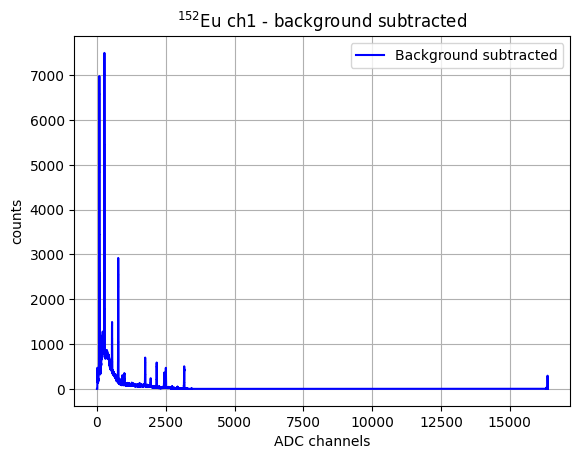

In [52]:
bin_europio_ch1_corr, hist_europio_ch1_corr = ben.background(europio_ch1, fondo2_ch1, None, 'ADC channels', 'counts', '$^{152}$Eu ch1 - background subtracted')

In [53]:
# plt.step(bin_europio_ch0_corr, hist_europio_ch0_corr, color='#1f77b4', lw=1, label='ch0'), plt.step(bin_europio_ch1_corr, hist_europio_ch1_corr, color='orange', lw=1, label='ch1')
# plt.title('Spectra of $^{152}$Eu - background subtracted')
# plt.xlabel("ADC")
# plt.ylabel("counts")
# plt.yscale('log')
# custom_patches = [
#     Patch(edgecolor='#1f77b4', facecolor='none', linewidth=1, label='ch0'),
#     Patch(edgecolor='orange', facecolor='none', linewidth=1, label='ch1'),
# ]
# plt.legend(handles=custom_patches)
# plt.xlim(0, 4500)
# plt.ylim(1, 50000)
# plt.grid(alpha=0.5)
# plt.show()

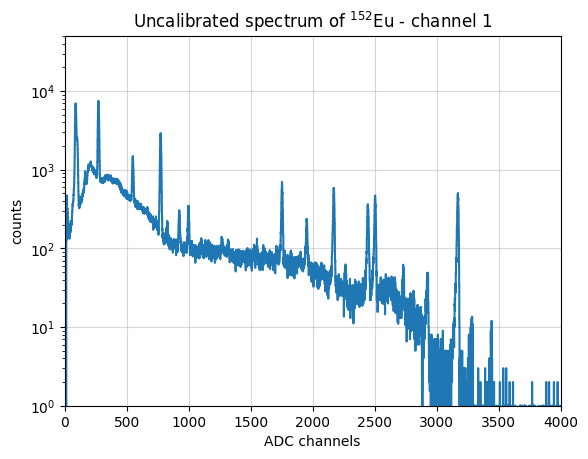

In [54]:
plt.step(bin_europio_ch1_corr, hist_europio_ch1_corr)
plt.xlim(0, 4000)
plt.ylim(1, 50000)
plt.yscale('log')
plt.grid(alpha=0.5)
plt.title('Uncalibrated spectrum of $^{152}$Eu - channel 1')
plt.xlabel('ADC channels')
plt.ylabel('counts')
# plt.axvline(2940, 0, 2000, color='red')
plt.show()

In [55]:
k=2
print(f'-----------------------------------------------')
print(f'Peak 1')
europioch1_peak1 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='1st peak of Eu', xmin=82, xmax=95, n=k)
print(f'Peak 2')
europioch1_peak2 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='2nd peak of Eu', xmin=265, xmax=280, n=k)
print(f'Peak 3')
europioch1_peak3 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='3rd peak of Eu', xmin=540, xmax=560, n=k)
print(f'Peak 4')
europioch1_peak4 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='4th peak of Eu', xmin=765, xmax=785, n=k)
print(f'Peak 5')
europioch1_peak5 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='5th peak of Eu', xmin=917, xmax=932, n=k)
print(f'Peak 6')
europioch1_peak6 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='6th peak of Eu', xmin=990, xmax=1007, n=k)
print(f'Peak 7')
europioch1_peak7 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='7th peak of Eu', xmin=1745, xmax=1765, n=k)
print(f'Peak 8')
europioch1_peak8 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='8th peak of Eu', xmin=1945, xmax=1960, n=k)
print(f'Peak 9')
europioch1_peak9 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='9th peak of Eu', xmin=2165, xmax=2180, n=k)
print(f'Peak 10')
europioch1_peak10 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='10th peak of Eu', xmin=2437, xmax=2455, n=k)
print(f'Peak 11')
europioch1_peak11 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='11th peak of Eu', xmin=2498, xmax=2520, n=k)
print(f'Peak 12')
europioch1_peak12 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='12th peak of Eu', xmin=2725, xmax=2740, n=k)
print(f'Peak 13')
europioch1_peak13 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='13th peak of Eu', xmin=2920, xmax=2935, n=k)
print(f'Peak 14')
europioch1_peak14 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='14th peak of Eu', xmin=3160, xmax=3183, n=k)

-----------------------------------------------
Peak 1
Ampiezza = 78736.14806667142 ± 1528.7843590780635
Media = 89.38656911404314 ± 0.08597366589925402
Sigma = 4.522362907206887 ± 0.11417183752350364
Chi-quadro = 101.38524620004905
Chi-quadro ridotto = 10.138524620004905
Integrale dell'istogramma nel range [80.34184329962937, 98.43129492845691] = 77852 ± 279
-----------------------------------------------
Peak 2
Ampiezza = 85073.65338061415 ± 1215.8176716056284
Media = 273.2130881783164 ± 0.06856549364035815
Sigma = 4.570491553309549 ± 0.0835870120859904
Chi-quadro = 104.02428825879782
Chi-quadro ridotto = 8.668690688233152
Integrale dell'istogramma nel range [264.0721050716973, 282.3540712849355] = 81613 ± 285
-----------------------------------------------
Peak 3
Ampiezza = 21343.160149296284 ± 432.3607363236168
Media = 550.2360269592177 ± 0.12834854242925978
Sigma = 6.007492847403818 ± 0.15534233977050915
Chi-quadro = 83.96016645026788
Chi-quadro ridotto = 4.938833320603993
Integra

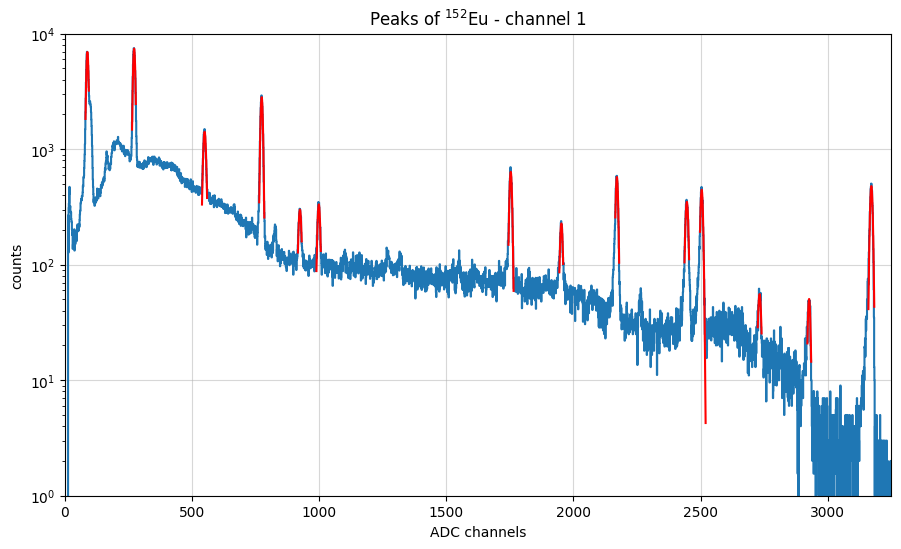

In [56]:
plot_peak1 = europioch1_peak1[5]
plot_peak2 = europioch1_peak2[5]
plot_peak3 = europioch1_peak3[5]
plot_peak4 = europioch1_peak4[5]
plot_peak5 = europioch1_peak5[5]
plot_peak6 = europioch1_peak6[5]
plot_peak7 = europioch1_peak7[5]
plot_peak8 = europioch1_peak8[5]
plot_peak9 = europioch1_peak9[5]
plot_peak10 = europioch1_peak10[5]
plot_peak11 = europioch1_peak11[5]
plot_peak12 = europioch1_peak12[5]
plot_peak13 = europioch1_peak13[5]
plot_peak14 = europioch1_peak14[5]

plt.figure(figsize=(16*2/3, 9*2/3))  # Larghezza = 16, Altezza = 9
plt.step(plot_peak1[0], plot_peak1[1]) #plot dei dati
plt.plot(plot_peak1[2], plot_peak1[3], color='red') #fit 1 picco
plt.plot(plot_peak2[2], plot_peak2[3], color='red') #fit 2 picco
plt.plot(plot_peak3[2], plot_peak3[3], color='red') #fit 3 picco
plt.plot(plot_peak4[2], plot_peak4[3], color='red') #fit 4 picco
plt.plot(plot_peak5[2], plot_peak5[3], color='red') #fit 5 picco
plt.plot(plot_peak6[2], plot_peak6[3], color='red') #fit 6 picco
plt.plot(plot_peak7[2], plot_peak7[3], color='red') #fit 7 picco
plt.plot(plot_peak8[2], plot_peak8[3], color='red') #fit 8 picco
plt.plot(plot_peak9[2], plot_peak9[3], color='red') #fit 9 picco
plt.plot(plot_peak10[2], plot_peak10[3], color='red') #fit 10 picco
plt.plot(plot_peak11[2], plot_peak11[3], color='red') #fit 11 picco
plt.plot(plot_peak12[2], plot_peak12[3], color='red') #fit 12 picco
plt.plot(plot_peak13[2], plot_peak13[3], color='red') #fit 13 picco
plt.plot(plot_peak14[2], plot_peak14[3], color='red') #fit 14 picco
plt.xlim(0, 3250)
# plt.xlim(2600, 2800)
plt.ylim(1, 1e+4)
plt.grid(alpha=0.5)
plt.yscale('log')
plt.title('Peaks of $^{152}$Eu - channel 1')
plt.xlabel('ADC channels')
plt.ylabel('counts')
plt.show()

### efficienza plot

In [415]:
'''a partire dall'attività del 1/12/1990 (395 kBq) e da quella di settembre 2022 (74.7 kBq) calcoliamo l'attività odierna: '''
a1 = 395 #attività iniziale
a2 = 74.7 #attività a settembre 2022
delta = 11597*24*60*60 #delta di tempo 1990-2022
cost = -np.log(a2/a1)/(delta) #costante di decadimento
deltaf = 811*24*60*60 #tempo tra 1/9/2022 e 20/11/2024
afEU = a2*np.exp(-cost*deltaf)*1000 #attività al 10/11/2024
print(f'costante di decadimento \u03BB: {cost}\nattività al 20/11/2024: {afEU}')

'''l'angolo solido è dato da: sin^2(arctan(r/d)/2)
dove r è il raggio del detector e d è la distanza della sorgente dal detector'''
r = 1.95 #cm
r_err = 0.05/np.sqrt(24)
d = 20
d_err = 0.05/np.sqrt(24) #cm
alfa = (np.sin(np.arctan(r/d)/2))**2
alfa_err= (np.sin(np.arctan(r/d))/(d**2+r**2))*np.sqrt(r**2*d_err**2+d**2*r_err**2)
print('--------------------------------------------------------')
print(f'angolo solido è \u03B1 = {alfa}')

costante di decadimento λ: 1.6621133586215925e-09
attività al 20/11/2024: 66487.57873363837
--------------------------------------------------------
angolo solido è α = 0.002359751474426659


In [416]:
'''qua mettiamo l'integral dei picchi e le ripesttive abundances'''
picchi = [europioch1_peak1, europioch1_peak2, europioch1_peak3, europioch1_peak4, europioch1_peak5, europioch1_peak6, europioch1_peak7, 
                   europioch1_peak8, europioch1_peak9, europioch1_peak10, europioch1_peak11, europioch1_peak12, europioch1_peak13, europioch1_peak14]

photons = []
photons_err = []
energies = []
energies_err = []

for i, elemento in enumerate(picchi):
    if i > 0:
        photons.append(elemento[6])
        photons_err.append(elemento[7])
        energies.append(elemento[0][1]*calibrazione_ch1[0]+calibrazione_ch1[1])
        energies_err.append((elemento[0][1]**2)*(calibrazione_ch1[2]**2)+(elemento[1][1]**2)*(calibrazione_ch1[0]**2)+calibrazione_ch1[1]**2)

photons = np.array(photons)
photons_err = np.array(photons_err)
energies = np.array(energies)
energies_err = np.array(energies_err)

for i in range(len(energies)):
    print(f'picco {i} = {energies[i]} keV')

abundances = np.array([0.2841, 0.0755, 0.2659, 0.02238, 0.028, 0.1297, 0.04243, 0.145, 0.1013, 0.1341, 0.01416, 0.01633, 0.2085])
abundances_err = np.array([0.0013, 0.0004, 0.0012, 0.0001, 0.0002, 0.0006, 0.00023, 0.0006, 0.0006, 0.0006, 0.00009, 0.00009, 0.0008])

t = 1195.729 #tempo di acquisizione

afEU = 7.47E+04

effs = photons/(afEU*t*abundances*alfa)
effs_err = 1/(afEU*t)*np.sqrt((photons_err/(alfa*abundances))**2+(photons*abundances_err/(alfa*abundances**2))**2+(photons*alfa_err/(alfa**2*abundances)))

rel = np.array([141.0, 36.6, 127.2, 10.71, 15.00, 62.6, 20.54, 70.4, 48.7, 65.0, 6.67, 7.76, 100])
rel_err = np.array([4.0, 1.1, 1.3, 0.11, 0.15, 0.6, 0.21, 0.7, 0.5, 0.7, 0.07, 0.08, 1.0])
eff_rel = photons*rel[12]/(photons[12]*rel)
# eff_rel_err = np.sqrt((rel[12]*photons_err/(photons[12]*rel))**2+(photons*rel_err[12]/(photons[12]*rel))**2+(photons*rel[12]*photons_err[12]/(rel*photons[12]**2))**2+(photons*rel[12]*rel_err[12]/(rel**2+photons[12]))**2)
eff_rel_err = np.array([0.3164258264, 0.3345322128, 0.08344660616, 0.1766194099, 0.1272506365, 0.2395137904, 0.06868437518, 0.03638600575, 0.0406973523, 0.03353639526, 0.08675728808, 0.05999092899, 0.022975141])


picco 0 = 121.73573972281969 keV
picco 1 = 244.68889395272222 keV
picco 2 = 344.2979287391655 keV
picco 3 = 411.05076731219634 keV
picco 4 = 443.98192568899435 keV
picco 5 = 778.86745471796 keV
picco 6 = 867.2205390550682 keV
picco 7 = 964.0932607678609 keV
picco 8 = 1086.1533897572829 keV
picco 9 = 1112.0890217290032 keV
picco 10 = 1213.1173000109025 keV
picco 11 = 1299.5213513263413 keV
picco 12 = 1408.128478113193 keV


### relative eff

Risultati del fit:
A = 13.976719645218752 ± 10.017744814512392
tau = -716.7044163542818 ± 1118.3206519401847
f = -1.7956331265323293 ± 11.717996381914729

Chi quadri:
1.3916003981973186
19.08669483868691
1027.0650928754267
53.02918676536929
9.689433730934068
10.99616934802582
16.41547190906102
39.27015534999002
116.31648060317737
57.51234089839817
297.73291824344153
234.71334262203078
1324.5908587913102


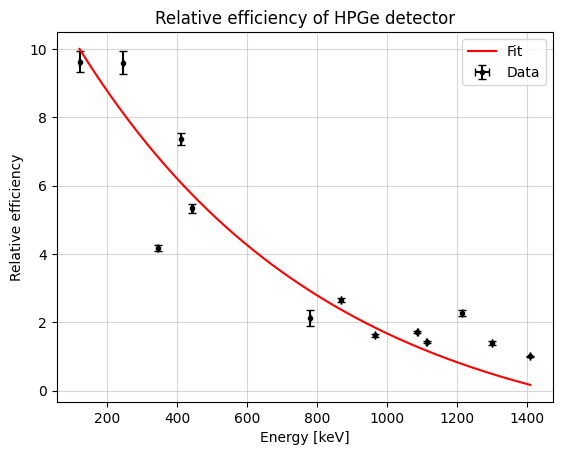

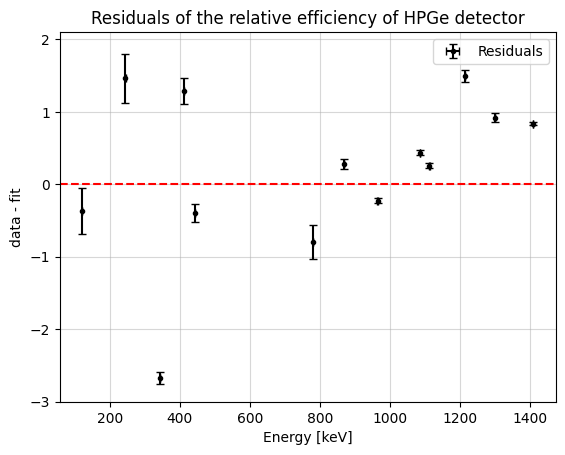

In [417]:
# Definizione della funzione esponenziale
def exp(x, A, tau, f):
    return A * np.exp(x / tau) + f

# Calcolo della varianza totale, considerando incertezze su x e y
def total_variance(x, x_err, y_err, A, tau, f):
    y_model = exp(x, A, tau, f)
    dy_dx = (A / tau) * np.exp(x / tau)  # Derivata di exp rispetto a x
    return y_err**2 + (dy_dx * x_err)**2

# Funzione di fit con curve_fit
def fit_with_x_errors(x, y, x_err, y_err, initial_guess):
    def wrapped_func(x, A, tau, f):
        return exp(x, A, tau, f)
    
    # Stima iniziale dei pesi
    weights = 1 / np.sqrt(total_variance(x, x_err, y_err, *initial_guess))
    
    # Fit con curve_fit
    params, covariance = curve_fit(wrapped_func, x, y, sigma=weights, p0=initial_guess, absolute_sigma=True)
    return params, covariance

# Parametri iniziali
initial_guess = [1909.4, -1/0.002, 1]
# Eseguiamo il fit
params, covariance = fit_with_x_errors(energies, eff_rel, energies_err, eff_rel_err, initial_guess)
Arel, taurel, frel = params
Arel_err, taurel_err, frel_err = np.sqrt(np.diag(covariance))
# Stampa dei risultati
print("Risultati del fit:")
print(f"A = {Arel} ± {Arel_err}")
print(f"tau = {taurel} ± {taurel_err}")
print(f"f = {frel} ± {frel_err}")
#chi2
def chi2(x, A, tau, f, y, sy):
    expected = exp(x, A, tau, f)
    chi2 = ((y-expected)/sy)**2
    return chi2
chi2_eff = chi2(energies, params[0], params[1], params[2], eff_rel, eff_rel_err)
print('\nChi quadri:')
for i in range(len(chi2_eff)):
    print(f'{chi2_eff[i]}')

x_fit = np.linspace(energies.min(), energies.max(), 1000)
plt.errorbar(energies, eff_rel, xerr=energies_err, yerr=eff_rel_err, fmt='o', color='black', label='Data', capsize=3, markersize=3)
plt.plot(x_fit, exp(x_fit, Arel, taurel, frel), lw=1.5, color='red', label='Fit')
plt.xlabel("Energy [keV]")
plt.ylabel("Relative efficiency")
plt.title("Relative efficiency of HPGe detector")
plt.legend()
plt.grid(alpha=0.5)
plt.savefig('grafici/efficiency_calibration/hpge_eff_relativa.pdf')
plt.show()

plt.errorbar(energies, eff_rel-exp(energies, Arel, taurel, frel), xerr=energies_err, yerr=eff_rel_err, fmt='o', label='Residuals', capsize=3, markersize=3, color='black')
plt.axhline(0, lw=1.5, color='red', linestyle='--', )
plt.xlabel("Energy [keV]")
plt.ylabel("data - fit")
plt.title("Residuals of the relative efficiency of HPGe detector")
plt.legend()
plt.grid(alpha=0.5)
plt.ylim(-3, 2.1)
plt.savefig('grafici/efficiency_calibration/hpge_rel_eff_residui.pdf')
plt.show()

Risultati del fit:
A = 13.976719645218752 ± 10.017744814512392
tau = -716.7044163542818 ± 1118.3206519401847
f = -1.7956331265323293 ± 11.717996381914729

Chi quadri:
1.3916003981973186
19.08669483868691
53.02918676536929
9.689433730934068
10.99616934802582
16.41547190906102
39.27015534999002
116.31648060317737
57.51234089839817
297.73291824344153
234.71334262203078
1324.5908587913102


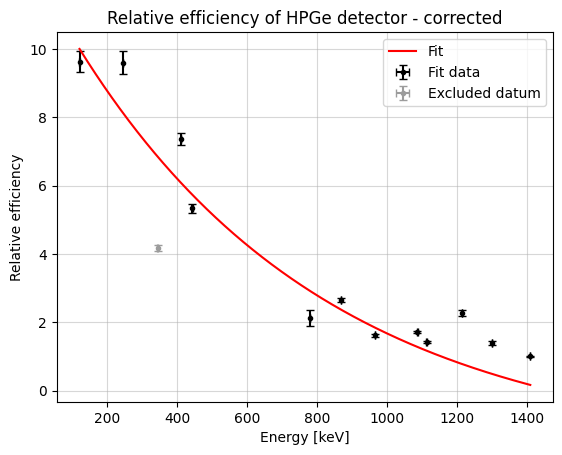

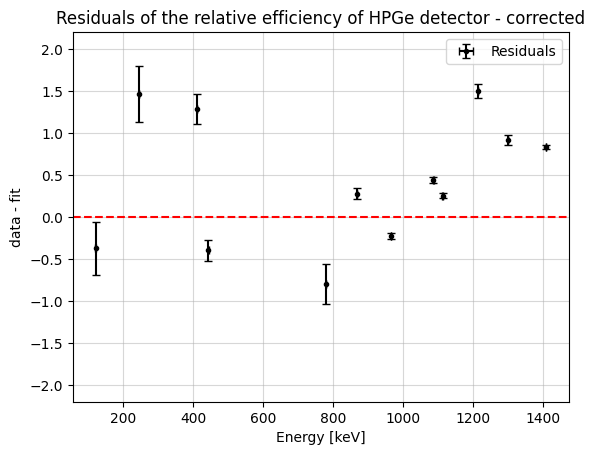

In [418]:
energies_ok = []
energies_ok_err = []
eff_rel_ok = []
eff_rel_ok_err =[]

for i in range(len(energies)):
    if i !=2:
        energies_ok.append(energies[i])
        energies_ok_err.append(energies_err[i])
        eff_rel_ok.append(eff_rel[i])
        eff_rel_ok_err.append(eff_rel_err[i])

energies_ok = np.array(energies_ok)
energies_ok_err = np.array(energies_ok_err)
eff_rel_ok = np.array(eff_rel_ok)
eff_rel_ok_err = np.array(eff_rel_ok_err)

# Parametri iniziali
initial_guess = [1909.4, -1/0.002, 1]
# Eseguiamo il fit
params, covariance = fit_with_x_errors(energies, eff_rel, energies_err, eff_rel_err, initial_guess)
Arelok, taurelok, frelok = params
Arelok_err, taurelok_err, frelok_err = np.sqrt(np.diag(covariance))
# Stampa dei risultati
print("Risultati del fit:")
print(f"A = {Arelok} ± {Arelok_err}")
print(f"tau = {taurelok} ± {taurelok_err}")
print(f"f = {frelok} ± {frelok_err}")
#chi2
def chi2(x, A, tau, f, y, sy):
    expected = exp(x, A, tau, f)
    chi2 = ((y-expected)/sy)**2
    return chi2
chi2_eff = chi2(energies_ok, params[0], params[1], params[2], eff_rel_ok, eff_rel_ok_err)
print('\nChi quadri:')
for i in range(len(chi2_eff)):
    print(f'{chi2_eff[i]}')

x_fit = np.linspace(energies_ok.min(), energies_ok.max(), 1000)
plt.errorbar(energies_ok, eff_rel_ok, xerr=energies_ok_err, yerr=eff_rel_ok_err, fmt='o', color='black', label='Fit data', capsize=3, markersize=3)
plt.errorbar(energies[2], eff_rel[2], xerr=energies_err[2], yerr=eff_rel_err[2], fmt='o', label='Excluded datum', capsize=3, markersize=3, color='#9c9c9c')
plt.plot(x_fit, exp(x_fit, Arelok, taurelok, frelok), lw=1.5, color='red', label='Fit')
plt.xlabel("Energy [keV]")
plt.ylabel("Relative efficiency")
plt.title("Relative efficiency of HPGe detector - corrected")
plt.legend()
plt.grid(alpha=0.5)
plt.savefig('grafici/efficiency_calibration/hpge_eff_relativa_corr.pdf')
plt.show()

plt.errorbar(energies_ok, eff_rel_ok-exp(energies_ok, Arelok, taurelok, frelok), xerr=energies_ok_err, yerr=eff_rel_ok_err, fmt='o', label='Residuals', capsize=3, markersize=3, color='black')
plt.axhline(0, lw=1.5, color='red', linestyle='--', )
plt.xlabel("Energy [keV]")
plt.ylabel("data - fit")
plt.title("Residuals of the relative efficiency of HPGe detector - corrected")
plt.legend()
plt.grid(alpha=0.5)
plt.ylim(-2.2, 2.2)
plt.savefig('grafici/efficiency_calibration/hpge_rel_eff_residui_corr.pdf')
plt.show()

### intrinsic eff

Risultati del fit:
A = 1.8510108822738616 ± 9.308609257120832
tau = -623.6993684237776 ± 7164.395972883949
f = -0.12419061352929232 ± 11.02949445523409

Chi quadri:
20.698513682528624
307.05563176663907
8271.708824029787
130.4905994231242
5.520200335337092
1048.6581450295857
19.455204745720657
266.2159158169033
95.94214348645127
11.629974439324538
260.07468040277433
131.22324941251964
1359.4315177806222


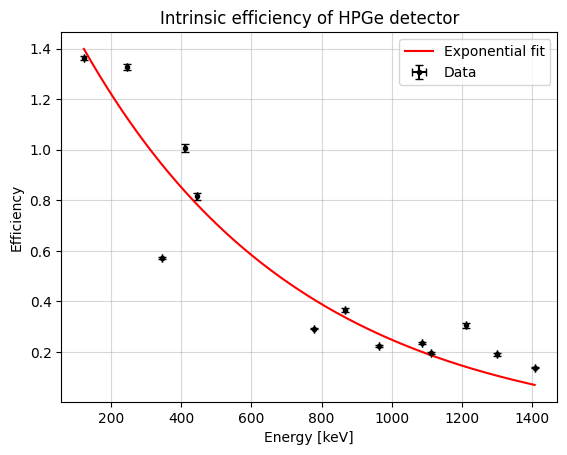

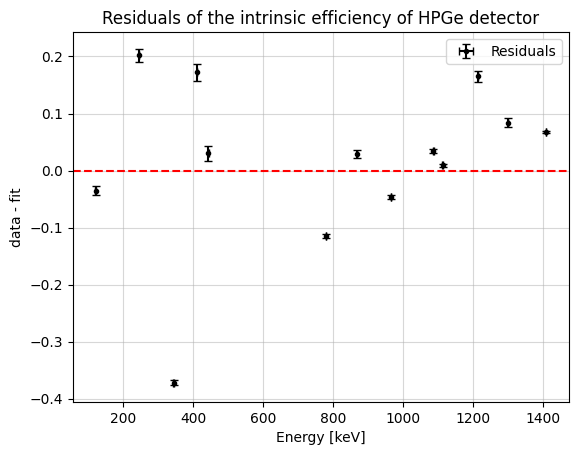

In [419]:
# Definizione della funzione esponenziale
def exp(x, A, tau, f):
    return A * np.exp(x / tau) + f

# Calcolo della varianza totale, considerando incertezze su x e y
def total_variance(x, x_err, y_err, A, tau, f):
    y_model = exp(x, A, tau, f)
    dy_dx = (A / tau) * np.exp(x / tau)  # Derivata di exp rispetto a x
    return y_err**2 + (dy_dx * x_err)**2

# Funzione di fit con curve_fit
def fit_with_x_errors(x, y, x_err, y_err, initial_guess):
    def wrapped_func(x, A, tau, f):
        return exp(x, A, tau, f)
    
    # Stima iniziale dei pesi
    weights = 1 / np.sqrt(total_variance(x, x_err, y_err, *initial_guess))
    
    # Fit con curve_fit
    params, covariance = curve_fit(wrapped_func, x, y, sigma=weights, p0=initial_guess, absolute_sigma=True)
    return params, covariance

# Parametri iniziali
initial_guess = [1909.4, -1/0.002, 1]
# Eseguiamo il fit
params, covariance = fit_with_x_errors(energies, effs, energies_err, effs_err, initial_guess)
A, tau, f = params
A_err, tau_err, f_err = np.sqrt(np.diag(covariance))
# Stampa dei risultati
print("Risultati del fit:")
print(f"A = {A} ± {A_err}")
print(f"tau = {tau} ± {tau_err}")
print(f"f = {f} ± {f_err}")
#chi2
def chi2(x, A, tau, f, y, sy):
    expected = exp(x, A, tau, f)
    chi2 = ((y-expected)/sy)**2
    return chi2
chi2_eff = chi2(energies, params[0], params[1], params[2], effs, effs_err)
print('\nChi quadri:')
for i in range(len(chi2_eff)):
    print(f'{chi2_eff[i]}')

# Creazione dei dati per il grafico del fit
x_fit = np.linspace(min(energies), max(energies), 1000)
y_fit = exp(x_fit, A, tau, f)
effs_fit = exp(energies, A, tau, f)
# Plot dei dati e del fit
plt.errorbar(energies, effs, xerr=energies_err, yerr=effs_err, fmt='o', label='Data', capsize=3, markersize=3, color='black')
plt.plot(x_fit, y_fit, color='red', label='Exponential fit')
plt.xlabel("Energy [keV]")
plt.ylabel("Efficiency")
plt.title("Intrinsic efficiency of HPGe detector")
plt.legend()
plt.grid(alpha=0.5)
plt.savefig('grafici/efficiency_calibration/hpge_eff_primofit.pdf')
plt.show()

plt.errorbar(energies, effs-effs_fit, xerr=energies_err, yerr=effs_err, fmt='o', label='Residuals', capsize=3, markersize=3, color='black')
plt.axhline(0, lw=1.5, color='red', linestyle='--', )
plt.xlabel("Energy [keV]")
plt.ylabel("data - fit")
plt.title("Residuals of the intrinsic efficiency of HPGe detector")
plt.legend()
plt.grid(alpha=0.5)
plt.savefig('grafici/efficiency_calibration/hpge_primofit_residui.pdf')
plt.show()


Risultati del fit:
A = 2.885232441714704 ± 67.58567151347835
tau = -1718.5942270052517 ± 55334.04667472615
f = -1.2860681343110327 ± 69.58027028523621

Ci quadri
24.645619998523657
93.96379846558912
1.843595542680007
95.21892311567727
180.87110772739305
12.11743806305783
103.63710509668641
266.96156428413315
275.64607509476684
6845.850038245613


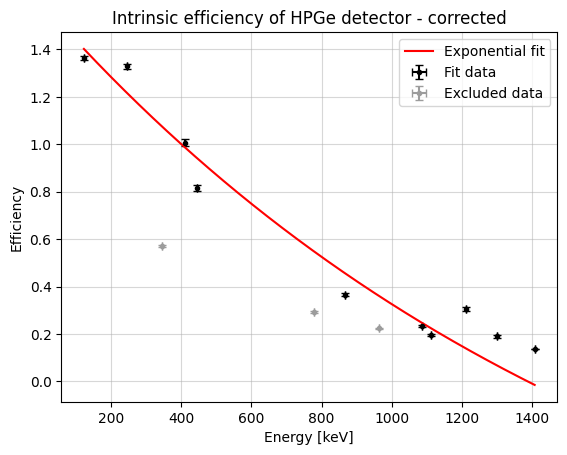

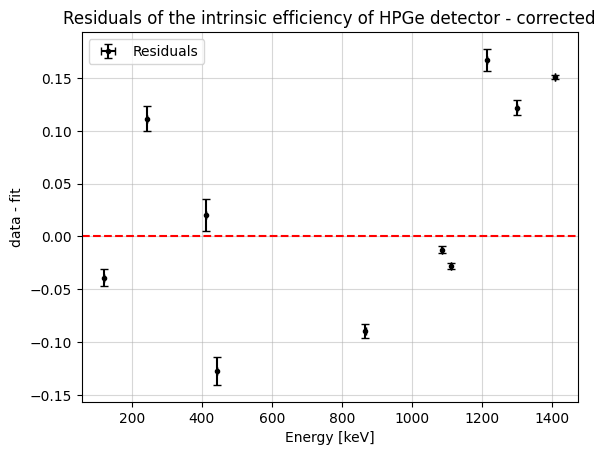

In [420]:
energies_final = []
effs_final = []
energies_err_final = []
effs_err_final = []

energies_no = []
energies_err_no = []
effs_no = []
effs_err_no = []

for i in range(len(energies)):
    if i!=2 and i!=5 and i!=7:
        energies_final.append(energies[i])
        effs_final.append(effs[i])
        energies_err_final.append(energies_err[i])
        effs_err_final.append(effs_err[i])
    else: 
        energies_no.append(energies[i])
        effs_no.append(effs[i])
        energies_err_no.append(energies_err[i])
        effs_err_no.append(effs_err[i])

energies_final = np.array(energies_final)
energies_err_final = np.array(energies_err_final)
effs_final = np.array(effs_final)
effs_err_final = np.array(effs_err_final)

energies_no = np.array(energies_no)
energies_err_no = np.array(energies_err_no)
effs_no = np.array(effs_no)
effs_err_no = np.array(effs_err_no)


# Parametri iniziali
initial_guess = [1909.4, -1/0.002, 1]
# Eseguiamo il fit
params, covariance = fit_with_x_errors(energies_final, effs_final, energies_err_final, effs_err_final, initial_guess)
A, tau, f = params
A_err, tau_err, f_err = np.sqrt(np.diag(covariance))
# Stampa dei risultati
print("Risultati del fit:")
print(f"A = {A} ± {A_err}")
print(f"tau = {tau} ± {tau_err}")
print(f"f = {f} ± {f_err}")
#chi2
def chi2(x, A, tau, f, y, sy):
    expected = exp(x, A, tau, f)
    chi2 = ((y-expected)/sy)**2
    return chi2
chi2_eff = chi2(energies_final, params[0], params[1], params[2], effs_final, effs_err_final)
print('\nCi quadri')
for i in range(len(chi2_eff)):
    print(f'{chi2_eff[i]}')


# Creazione dei dati per il grafico del fit
x_fit = np.linspace(min(energies_final), max(energies_final), 1000)
y_fit = exp(x_fit, A, tau, f)
effs_fit = exp(energies_final, A, tau, f)
# Plot dei dati e del fit
plt.errorbar(energies_final, effs_final, xerr=energies_err_final, yerr=effs_err_final, fmt='o', label='Fit data', capsize=3, markersize=3, color='black')
plt.errorbar(energies_no, effs_no, xerr=energies_err_no, yerr=effs_err_no, fmt='o', label='Excluded data', capsize=3, markersize=3, color='#9c9c9c')
plt.plot(x_fit, y_fit, color='red', label='Exponential fit')
plt.xlabel("Energy [keV]")
plt.ylabel("Efficiency")
plt.title("Intrinsic efficiency of HPGe detector - corrected")
plt.legend()
plt.grid(alpha=0.5)
plt.savefig('grafici/efficiency_calibration/hpge_eff_final.pdf')
plt.show()

plt.errorbar(energies_final, effs_final-effs_fit, xerr=energies_err_final, yerr=effs_err_final, fmt='o', label='Residuals', capsize=3, markersize=3, color='black')
plt.axhline(0, lw=1.5, color='red', linestyle='--', )
plt.xlabel("Energy [keV]")
plt.ylabel("data - fit")
plt.title("Residuals of the intrinsic efficiency of HPGe detector - corrected")
plt.legend()
plt.grid(alpha=0.5)
plt.savefig('grafici/efficiency_calibration/hpge_final_residui.pdf')
plt.show()

## NaI(Tl) EFFICIENCY CALIBRATION

### picchi

In [421]:
print(f'Peak 1 Na')
sodio_peak1 = ben.normal_PLOT(bin_centers=bin_sodio_ch0_corr, counts=hist_sodio_ch0_corr, xlabel='ADC channels', ylabel='counts', titolo='First peak of $^{22}$Na', xmin=1350, xmax=1600, n=2)
print(f'Peak 2 Na')
sodio_peak2 = ben.normal_PLOT(bin_centers=bin_sodio_ch0_corr, counts=hist_sodio_ch0_corr, xlabel='ADC channels', ylabel='counts', titolo='Second peak of $^{22}$Na', xmin=3300, xmax=3800, n=2)
print(f'Peak 1 Am')
americio_peak = ben.normal_PLOT(bin_centers=bin_americio_ch0_corr, counts=hist_americio_ch0_corr, xlabel='ADC channels', ylabel='counts', titolo='Peak of $^{241}$Am', xmin=180, xmax=210, n=2)

Peak 1 Na
Ampiezza = 3697540.54636566 ± 4780.387316848829
Media = 1469.7140240992871 ± 0.0753701305588071
Sigma = 50.82980298739661 ± 0.07687536497353165
Chi-quadro = 3895.450989216009
Chi-quadro ridotto = 15.771056636502061
Integrale dell'istogramma nel range [1368.0544181244938, 1571.3736300740804] = 3523750 ± 1877
-----------------------------------------------
Peak 2 Na
Ampiezza = 1070699.0896962592 ± 1446.932123584376
Media = 3559.824076266031 ± 0.1265596219708771
Sigma = 81.14238443964994 ± 0.12673611221669107
Chi-quadro = 4451.403844810062
Chi-quadro ridotto = 8.956546971448816
Integrale dell'istogramma nel range [3397.5393073867313, 3722.108845145331] = 1019322 ± 1009
-----------------------------------------------
Peak 1 Am
Ampiezza = 616134.1133117713 ± 2615.7919444924883
Media = 193.60289245688517 ± 0.04385307087478374
Sigma = 13.76678352282919 ± 0.07478701007732134
Chi-quadro = 33.86041620947423
Chi-quadro ridotto = 1.2540894892397862
Integrale dell'istogramma nel range [16

In [ ]:
'''calcolo degli angoli solidi'''
r_tutti = 3.75 #cm
r_tutti_err = 0.05/np.sqrt(24)
dNa = 8.15
dNa_err = 0.05/np.sqrt(24) #cm
alfaNa = (r_tutti**2)/(4*dNa**2) #(np.sin(np.arctan(r/d)/2))**2
alfaNa_err = (1/4)*np.sqrt((2*r/d**2)**2*r_err**2 + (2*r**2/d**3)**2*d_err**2) #(np.sin(np.arctan(r/d))/(d**2+r**2))*np.sqrt(r**2*d_err**2+d**2*r_err**2)

dAm = 7.2
dAm_err = 0.05/np.sqrt(24) #cm
alfaAm = (r_tutti**2)/(4*dAm**2) #(np.sin(np.arctan(r/d)/2))**2
alfaAm_err = (1/4)*np.sqrt((2*r_tutti/dAm**2)**2*r_tutti_err**2 + (2*r**2/dAm**3)**2*dAm_err**2) #(np.sin(np.arctan(r/d))/(d**2+r**2))*np.sqrt(r**2*d_err**2+d**2*r_err**2)

dCo = 7.2
dCo_err = 0.05/np.sqrt(24)
alfaCo =  (r_tutti**2)/(4*dCo**2)
alfaCo_err = (1/4)*np.sqrt((2*r_tutti/dCo**2)**2*r_tutti_err**2 + (2*r_tutti**2/dCo**3)**2*dCo_err**2)

alfas = np.array([alfaAm, alfaNa, alfaCo, alfaNa, alfaCo])
alfas_err = np.array([alfaAm_err, alfaNa_err, alfaCo_err, alfaNa_err, alfaCo_err])

costante di decadimento del SODIO: 1.6621133586215925e-09
attività al 20/11/2024: 29459.4028213025

costante di decadimento dell AMERICIO: 1.6621133586215925e-09
attività al 20/11/2024: 74453.10893337417


### plot efficienza

In [ ]:
picchi = [sodio_peak1, sodio_peak2, americio_peak]
photons = []
photons_err = []
energies = []
energies_err = []

for i, elemento in enumerate(picchi):
    photons.append(elemento[6])
    photons_err.append(elemento[7])
    energies.append(elemento[0][1]*calibrazione_ch0[0]+calibrazione_ch0[1])
    energies_err.append((elemento[0][1]**2)*(calibrazione_ch0[2]**2)+(elemento[1][1]**2)*(calibrazione_ch0[0]**2)+calibrazione_ch0[1]**2)
    

photons = np.array(photons)
photons_err = np.array(photons_err)
energiesNA = np.array(energies)
energiesNA_err = np.array(energies_err)

abundances = np.array([1.807, 0.9994, 0.3592])
abundances_err = np.array([0.002, 0.0013, 0.0017])

tNa = 600 #tempo di acquisizione

afTOT = np.array([3.57E+05, 3.57E+05, 4.18E+05])

effsNAI = photons/(afTOT*tNa*abundances*alfas)
effsNAI_err = 1/(afTOT*t)*np.sqrt((photons_err/(alfas*abundances))**2+(photons*abundances_err/(alfas*abundances**2))**2+(photons*alfas_err/(alfa**2*abundances)))

# effsNAI = photons/(afTOT*t*abundances)
# effsNAI_err = 1/(afTOT*t)*np.sqrt((photons_err/(abundances))**2+(photons*abundances_err/(abundances**2))**2)


for i in range(len(energies)):
    print(f'{energies[i]} \t {effsNAI[i]}')

picchi[0][7], picchi[1][7], picchi[2][7]

picco dell americio: 58.64397792256323 
____________________________________

516.3501130618174 	 0.17200463230650845
1266.0153814477246 	 0.08996327550405127
58.64397792256323 	 0.09831964791509042


(1877, 1009, 775)

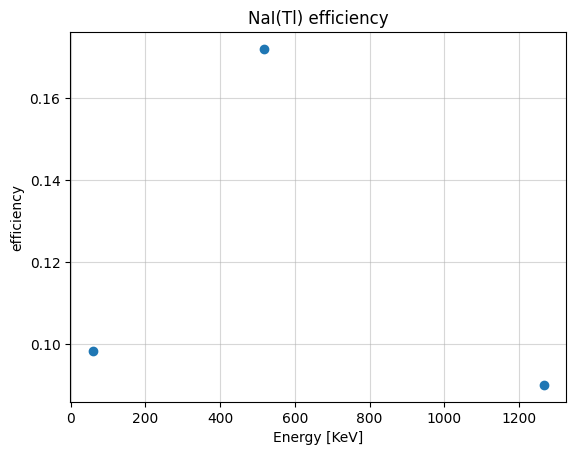

In [424]:
plt.scatter(energiesNA, effsNAI)#, xerr=energiesNA_err, yerr=effsNAI_err)
plt.grid(alpha=0.5)
plt.title('NaI(Tl) efficiency')
plt.xlabel('Energy [KeV]')
plt.ylabel('efficiency')
plt.show()

## SAMPLE ANALYSIS

In [425]:
fondo3_ch0_calib = fondo3_ch0*calibrazione_ch0[0]+calibrazione_ch0[1]
fondo3_ch1_calib = fondo3_ch1*calibrazione_ch1[0]+calibrazione_ch1[1]

zirconio_ch0_calib = zirconio_ch0*calibrazione_ch0[0]+calibrazione_ch0[1]
zirconio_ch1_calib = zirconio_ch1*calibrazione_ch1[0]+calibrazione_ch1[1]

autunite_ch0_calib = autunite_ch0*calibrazione_ch0[0]+calibrazione_ch0[1]
autunite_ch1_calib = autunite_ch1*calibrazione_ch1[0]+calibrazione_ch1[1]

enea_ch0_calib = enea_ch0*calibrazione_ch0[0]+calibrazione_ch0[1]
enea_ch1_calib = enea_ch1*calibrazione_ch1[0]+calibrazione_ch1[1]

porcini_ch0_calib = porcini_ch0*calibrazione_ch0[0]+calibrazione_ch0[1]
porcini_ch1_calib = porcini_ch1*calibrazione_ch1[0]+calibrazione_ch1[1]

cemento_ch0_calib = cemento_ch0*calibrazione_ch0[0]+calibrazione_ch0[1]
cemento_ch1_calib = cemento_ch1*calibrazione_ch1[0]+calibrazione_ch1[1]

potassio_ch0_calib = potassio_ch0*calibrazione_ch0[0]+calibrazione_ch0[1]
potassio_ch1_calib = potassio_ch1*calibrazione_ch1[0]+calibrazione_ch1[1]

### Zirconium Oxide

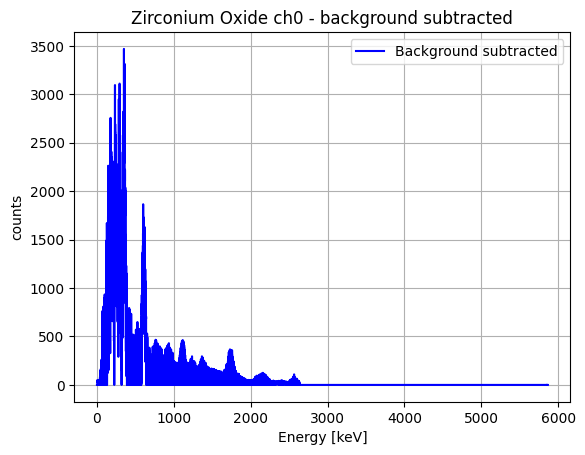

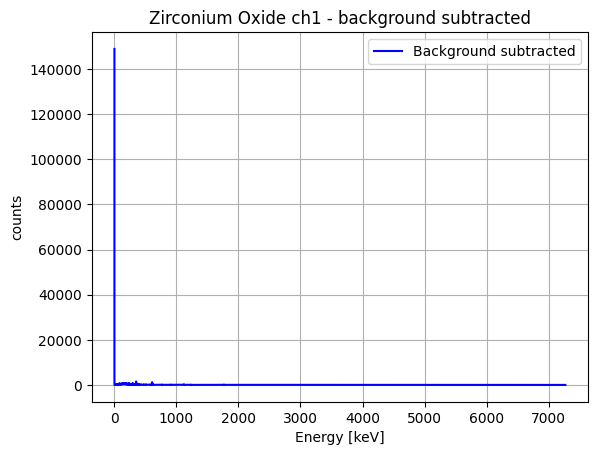

In [426]:
bin_zirconio_ch0_calib, hist_zirconio_ch0_calib = ben.background(zirconio_ch0_calib, fondo3_ch0_calib, None, 'Energy [keV]', 'counts', 'Zirconium Oxide ch0 - background subtracted')
bin_zirconio_ch1_calib, hist_zirconio_ch1_calib = ben.background(zirconio_ch1_calib, fondo3_ch1_calib, None, 'Energy [keV]', 'counts', 'Zirconium Oxide ch1 - background subtracted')


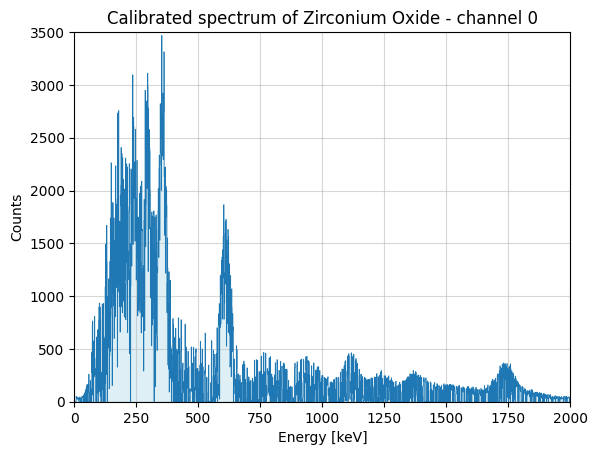

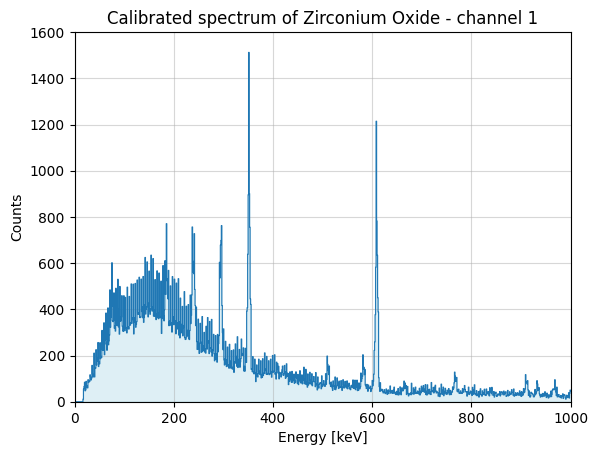

In [427]:
# Plot for Zirconium Oxide - Channel 0
plt.step(bin_zirconio_ch0_calib, hist_zirconio_ch0_calib, linewidth=0.5, where='mid')
plt.fill_between(bin_zirconio_ch0_calib, hist_zirconio_ch0_calib, step='mid', color='lightblue', alpha=0.4)
plt.xlim(0, 2000)
plt.ylim(0, 3500)
plt.grid(alpha=0.5)
plt.title('Calibrated spectrum of Zirconium Oxide - channel 0')
plt.xlabel('Energy [keV]')
plt.ylabel('Counts')
plt.savefig('grafici/samples/zirconio_ch0.pdf')
plt.show()

# Plot for Zirconium Oxide - Channel 1
plt.step(bin_zirconio_ch1_calib, hist_zirconio_ch1_calib, linewidth=0.8, where='mid')
plt.fill_between(bin_zirconio_ch1_calib, hist_zirconio_ch1_calib, step='mid', color='lightblue', alpha=0.4)
plt.xlim(0, 1000)
plt.ylim(0, 1600)
plt.grid(alpha=0.5)
plt.title('Calibrated spectrum of Zirconium Oxide - channel 1')
plt.xlabel('Energy [keV]')
plt.ylabel('Counts')
plt.savefig('grafici/samples/zirconio_ch1.pdf')
plt.show()


In [428]:
+k=2
print(f'------------- Zirconio ch0 -----------------')
print(f'Peak 1')
zirconio_ch0_peak1 = ben.normal_PLOT(bin_centers=bin_zirconio_ch0_calib, counts=hist_zirconio_ch0_calib, xlabel='Energy [keV]', ylabel='counts', titolo='1st peak of Eu', xmin=82, xmax=95, n=k)
print(f'Peak 2')
zirconio_ch0_peak2 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='2nd peak of Eu', xmin=265, xmax=280, n=k)
print(f'Peak 3')
zirconio_ch0_peak3 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='3rd peak of Eu', xmin=540, xmax=560, n=k)
print(f'Peak 4')
zirconio_ch0_peak4 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='4th peak of Eu', xmin=765, xmax=785, n=k)
print(f'Peak 5')
zirconio_ch0_peak5 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='5th peak of Eu', xmin=917, xmax=932, n=k)
print(f'Peak 6')
zirconio_ch0_peak6 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='6th peak of Eu', xmin=990, xmax=1007, n=k)

print(f'------------- Zirconio ch0 -----------------')


plt.step(bin_zirconio_ch0_calib, hist_zirconio_ch0_calib)
custom_patches = [
    Patch(edgecolor='#1f77b4', facecolor='none', linewidth=1, label='HPGe detector'),
]
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.title('Spectrum of the $^{152}$Eu - background subtracted')
plt.legend(handles=custom_patches)
plt.xlim(0, 1600)
plt.grid(alpha=0.5)
plt.savefig('grafici/efficiency_calibration/Eu_backsubtracted.pdf')
plt.show()

SyntaxError: cannot assign to expression here. Maybe you meant '==' instead of '='? (493189284.py, line 1)

### Potassium Chloride

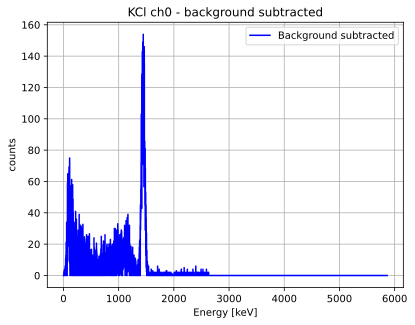

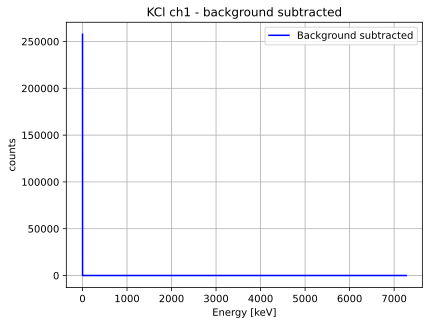

In [ ]:
bin_potassio_ch0_calib, hist_potassio_ch0_calib = ben.background(potassio_ch0_calib, fondo3_ch0_calib, None, 'Energy [keV]', 'counts', 'KCl ch0 - background subtracted')
bin_potassio_ch1_calib, hist_potassio_ch1_calib = ben.background(potassio_ch1_calib, fondo3_ch1_calib, None, 'Energy [keV]', 'counts', 'KCl ch1 - background subtracted')

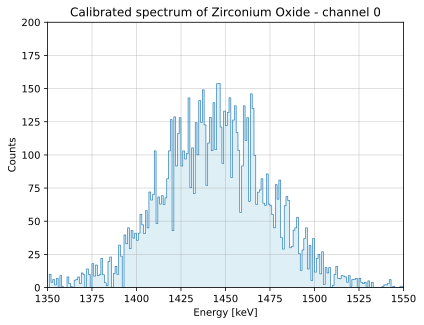

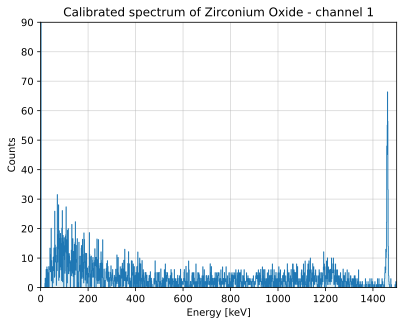

In [ ]:
# Plot for Potassium Chloride - Channel 0
plt.step(bin_potassio_ch0_calib, hist_potassio_ch0_calib, linewidth=0.6, where='mid')
plt.fill_between(bin_potassio_ch0_calib, hist_potassio_ch0_calib, step='mid', color='lightblue', alpha=0.4)
plt.xlim(1350, 1550)
plt.ylim(0, 200)
plt.grid(alpha=0.5)
plt.title('Calibrated spectrum of Zirconium Oxide - channel 0')
plt.xlabel('Energy [keV]')
plt.ylabel('Counts')
plt.show()

# Plot for Potassium Chloride - Channel 1
plt.step(bin_potassio_ch1_calib, hist_potassio_ch1_calib, linewidth=0.8, where='mid')
plt.fill_between(bin_potassio_ch1_calib, hist_potassio_ch1_calib, step='mid', color='lightblue', alpha=0.4)
plt.xlim(0, 1500)
plt.ylim(0, 90)
plt.grid(alpha=0.5)
plt.title('Calibrated spectrum of Zirconium Oxide - channel 1')
plt.xlabel('Energy [keV]')
plt.ylabel('Counts')
plt.show()

In [ ]:
k=2
print(f'------------- Potassium Chloride ch0 -----------------')
print(f'Peak 1')
potassio_ch0_peak1 = ben.normal_PLOT(bin_centers=bin_potassio_ch0_calib, counts=hist_potassio_ch0_calib, xlabel='Energy [keV]', ylabel='counts', titolo='', xmin=1400, xmax=1500, n=k)

print(f'------------- Potassium Chloride ch1 -----------------')
print(f'Peak 1')
potassio_ch1_peak1 = ben.normal_PLOT(bin_centers=bin_potassio_ch1_calib, counts=hist_potassio_ch1_calib, xlabel='Energy [keV]', ylabel='counts', titolo='', xmin=1450, xmax=1470, n=k)

------------- Potassium Chloride ch0 -----------------
Peak 1
Ampiezza = 9199.099022414193 ± 312.1008346180625
Media = 1443.8110436484346 ± 1.0721225678251305
Sigma = 29.76343854886877 ± 1.2841641584115049
Chi-quadro = 621.8266724585521
Chi-quadro ridotto = 6.410584252150022
Integrale dell'istogramma nel range [1384.2841665506971, 1503.3379207461721] = 8743 ± 93
-----------------------------------------------
------------- Potassium Chloride ch1 -----------------
Peak 1
Ampiezza = 388.06937916940143 ± 21.410426548085475
Media = 1460.8477680546687 ± 0.1604458029774894
Sigma = 2.5185351032813794 ± 0.1604488111579184
Chi-quadro = 41.41164889705136
Chi-quadro ridotto = 2.435979346885374
Integrale dell'istogramma nel range [1455.810697848106, 1465.8848382612314] = 363 ± 19
-----------------------------------------------


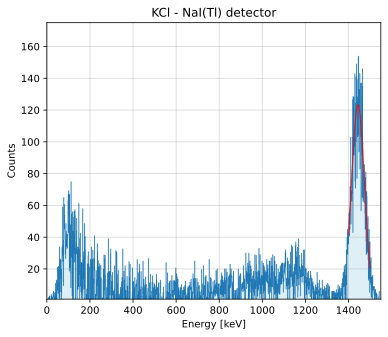

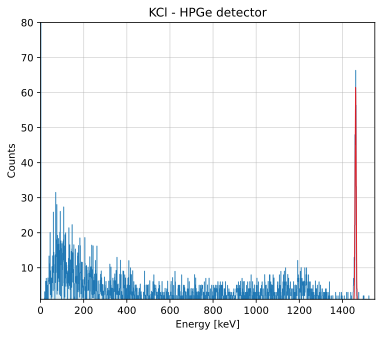

In [ ]:
plot_peak1_ch0 = potassio_ch0_peak1[5]
plot_peak1_ch1 = potassio_ch1_peak1[5]

plt.figure(figsize=(6, 5))  # Larghezza = 16, Altezza = 9
plt.step(plot_peak1_ch0[0], plot_peak1_ch0[1], linewidth=0.6, where='mid') #plot dei dati
plt.fill_between(plot_peak1_ch0[0], plot_peak1_ch0[1], step='mid', color='lightblue', alpha=0.4)
plt.plot(plot_peak1_ch0[2], plot_peak1_ch0[3], color='red', linewidth=1.2, alpha=0.8) #fit 1 picco
plt.xlim(0, 1550)
plt.ylim(1, 175)
plt.grid(alpha=0.5)
#plt.yscale('log')
plt.title('KCl - NaI(Tl) detector')
plt.xlabel('Energy [keV]')
plt.ylabel('Counts')
plt.show()

plt.figure(figsize=(6, 5))  # Larghezza = 16, Altezza = 9
plt.step(plot_peak1_ch1[0], plot_peak1_ch1[1], linewidth=0.6, where='mid') #plot dei dati
plt.fill_between(plot_peak1_ch1[0], plot_peak1_ch1[1], step='mid', color='lightblue', alpha=0.4)
plt.plot(plot_peak1_ch1[2], plot_peak1_ch1[3], color='red', linewidth=1, alpha=0.8) #fit 1 picco
plt.xlim(0, 1550)
plt.ylim(1, 80)
plt.grid(alpha=0.5)
#plt.yscale('log')
plt.title('KCl - HPGe detector')
plt.xlabel('Energy [keV]')
plt.ylabel('Counts')
plt.show()

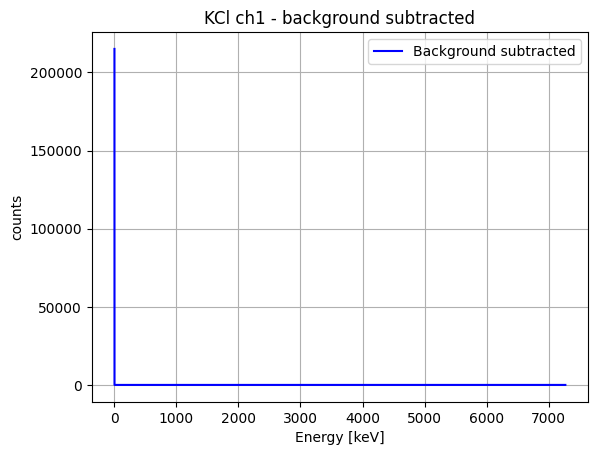

(0.0, 10.0)

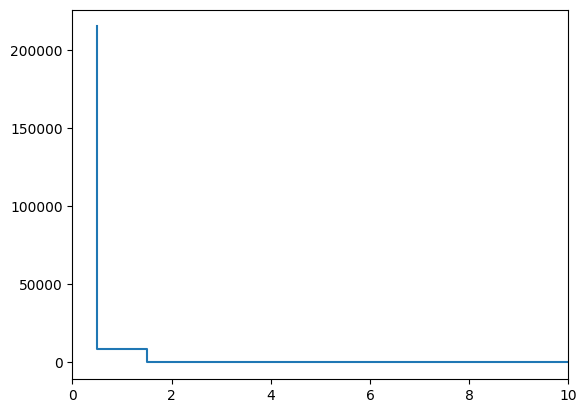

In [ ]:
bin_porcini_ch1_calib, hist_pporcini_ch1_calib = ben.background(porcini_ch1_calib, fondo3_ch1_calib, None, 'Energy [keV]', 'counts', 'KCl ch1 - background subtracted')
plt.step(bin_porcini_ch1_calib, hist_pporcini_ch1_calib)
plt.xlim(0, 10)

## RADON COUNTING

In [ ]:
exposed_ch0_calib = exposed_ch0*calibrazione_ch0[0]+calibrazione_ch0[1]
exposed_ch1_calib = exposed_ch1*calibrazione_ch1[0]+calibrazione_ch1[1]

unexposed_ch0_calib = unexposed_ch0*calibrazione_ch0[0]+calibrazione_ch0[1]
unexposed_ch1_calib = unexposed_ch1*calibrazione_ch1[0]+calibrazione_ch1[1]

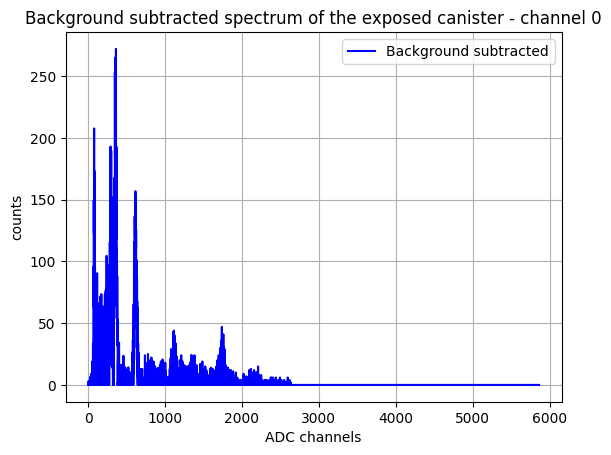

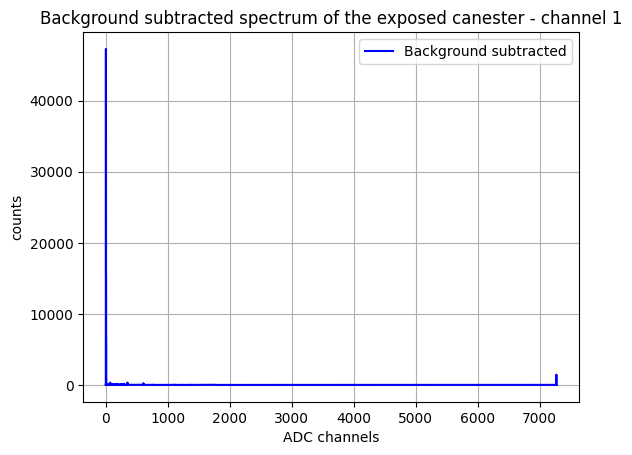

In [ ]:
bin_exposed_ch0, hist_exposed_ch0 = ben.background(exposed_ch0_calib, unexposed_ch0_calib, None, xlabel='ADC channels', ylabel='counts', titolo='Background subtracted spectrum of the exposed canister - channel 0')
bin_exposed_ch1, hist_exposed_ch1 = ben.background(exposed_ch1_calib, unexposed_ch1_calib, None, xlabel='ADC channels', ylabel='counts', titolo='Background subtracted spectrum of the exposed canester - channel 1')